In [1]:
import sys
sys.path.insert(0, '../scripts')

import direction_transition as dit
from preprocessing import get_all_sheet_names, read_excel_by_sheet
from intervals import mean_pellet_collect_time, plot_retrieval_time_by_block, perform_T_test
from path import *
import os

export_root = '../WT_export/Figure 4'
os.makedirs(export_root, exist_ok=True)
os.makedirs(os.path.join(export_root, 'Supplementary 5'))
action_prop = 0.75
block_prop = 0.6
meal_config=[60, 2]
result_prop = 0.25
day = 3

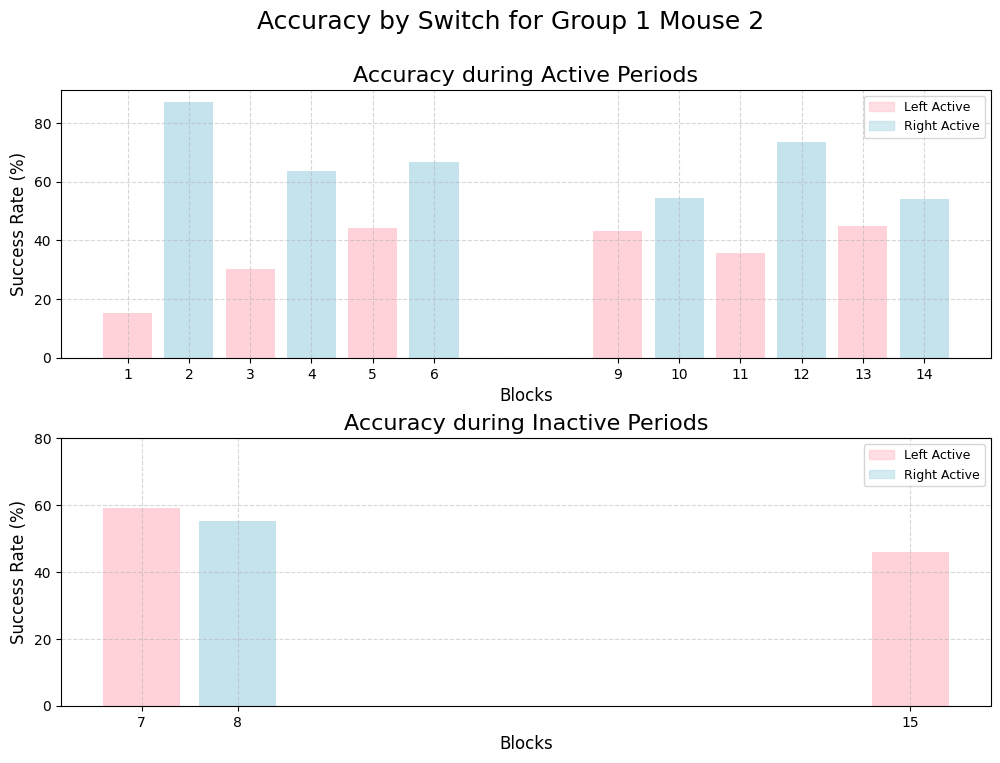

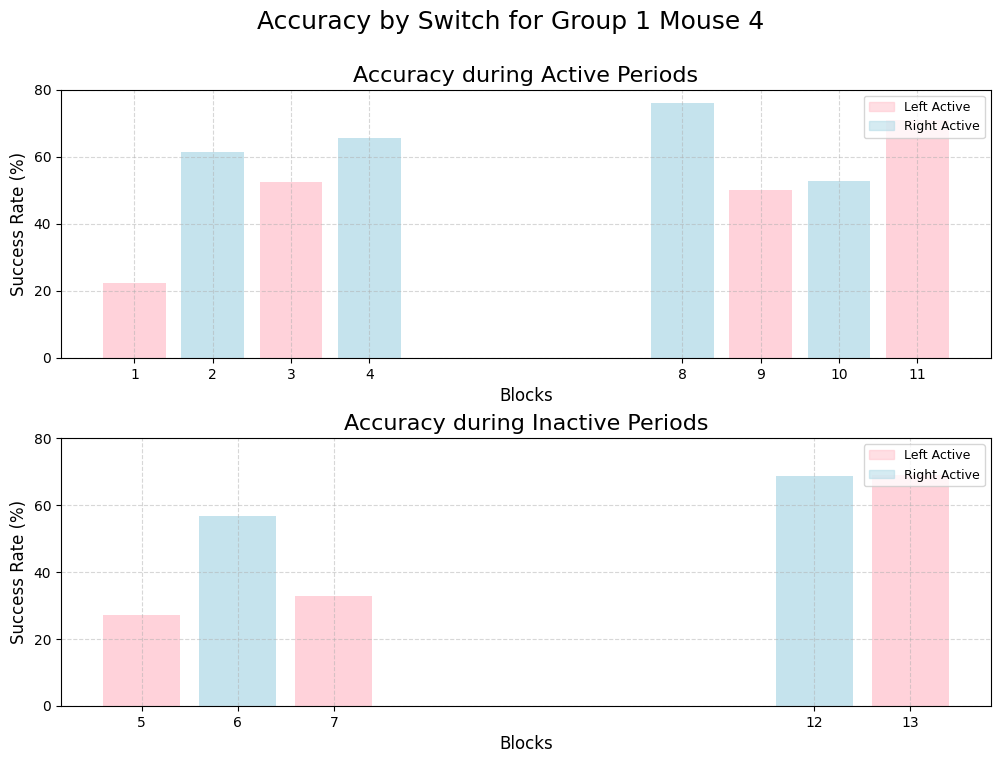

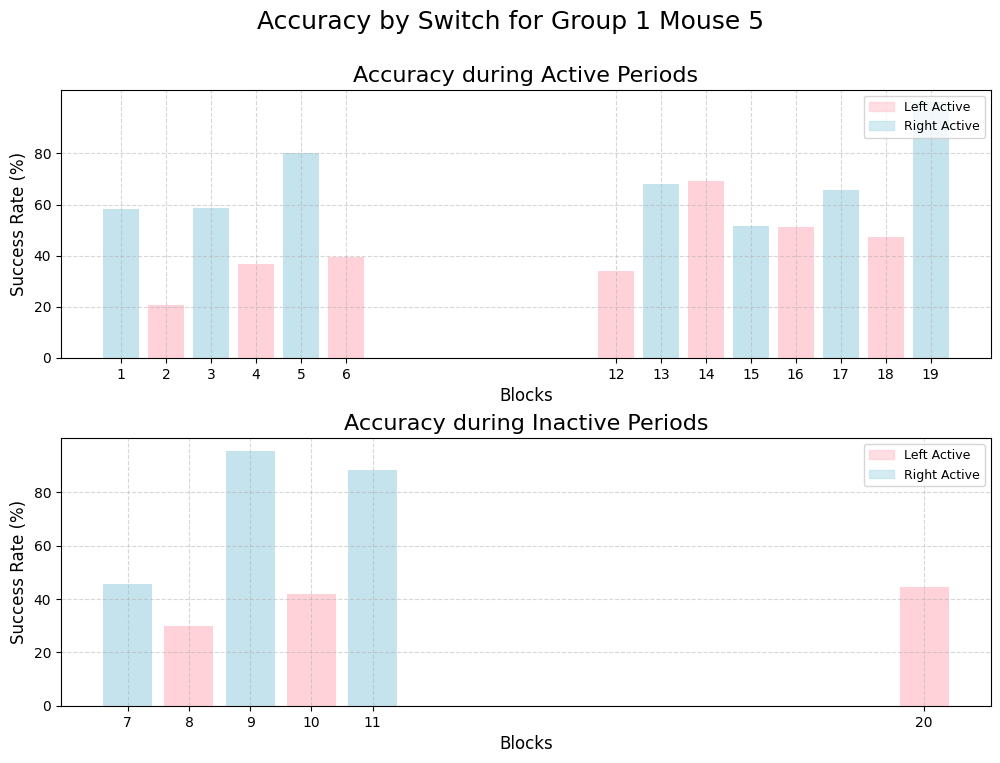

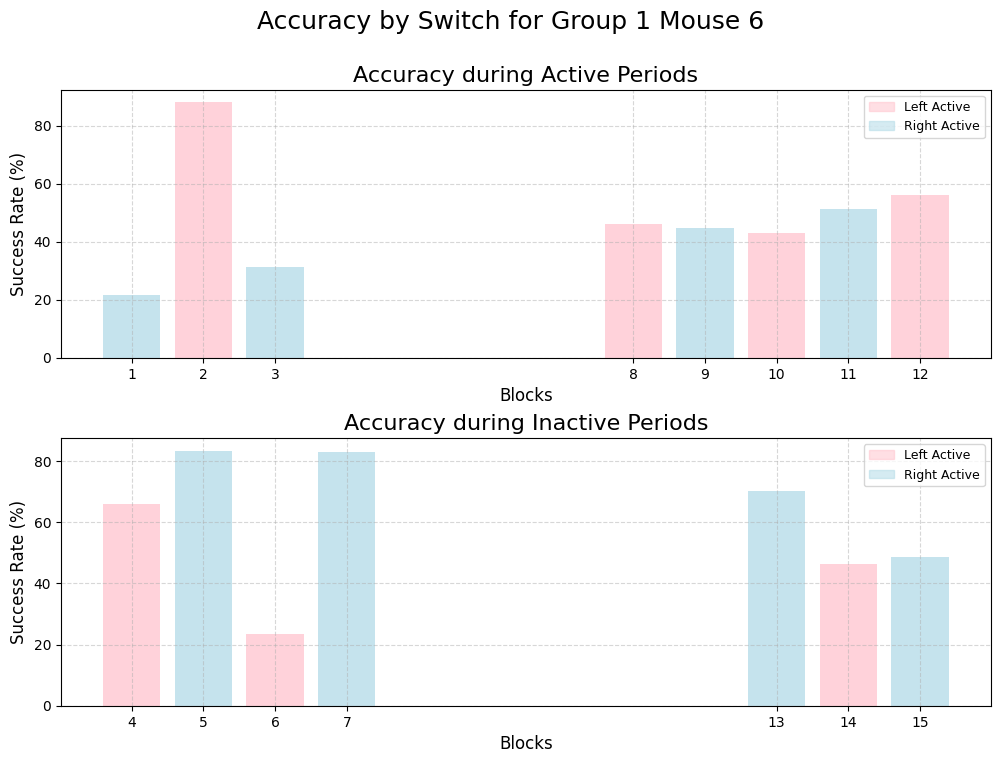

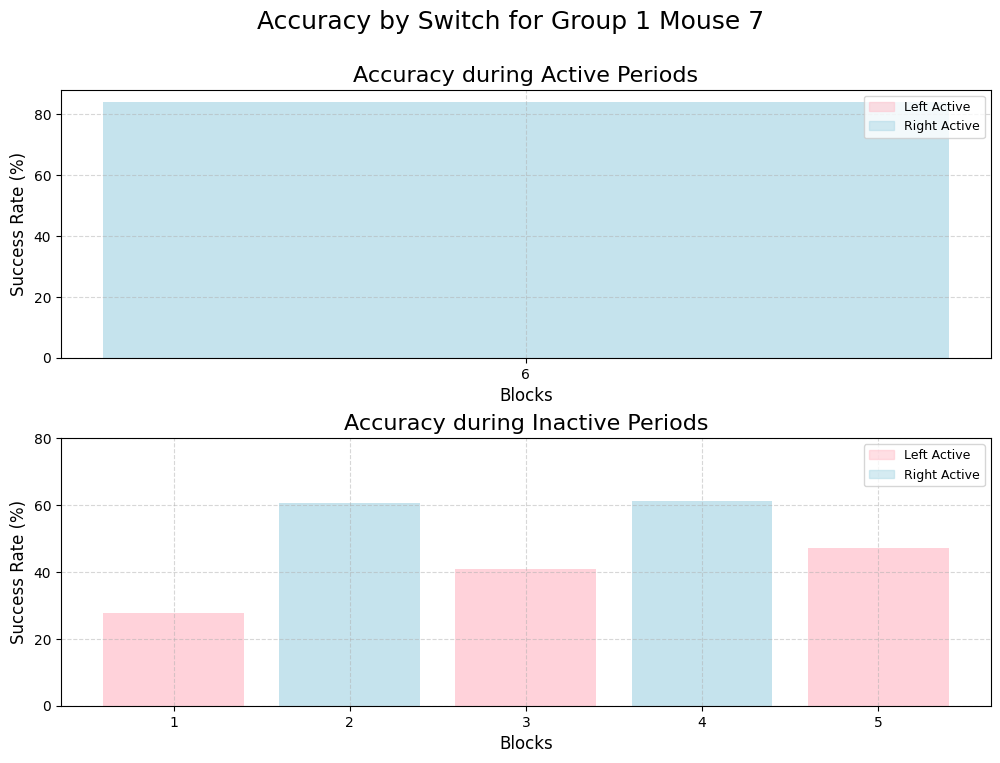

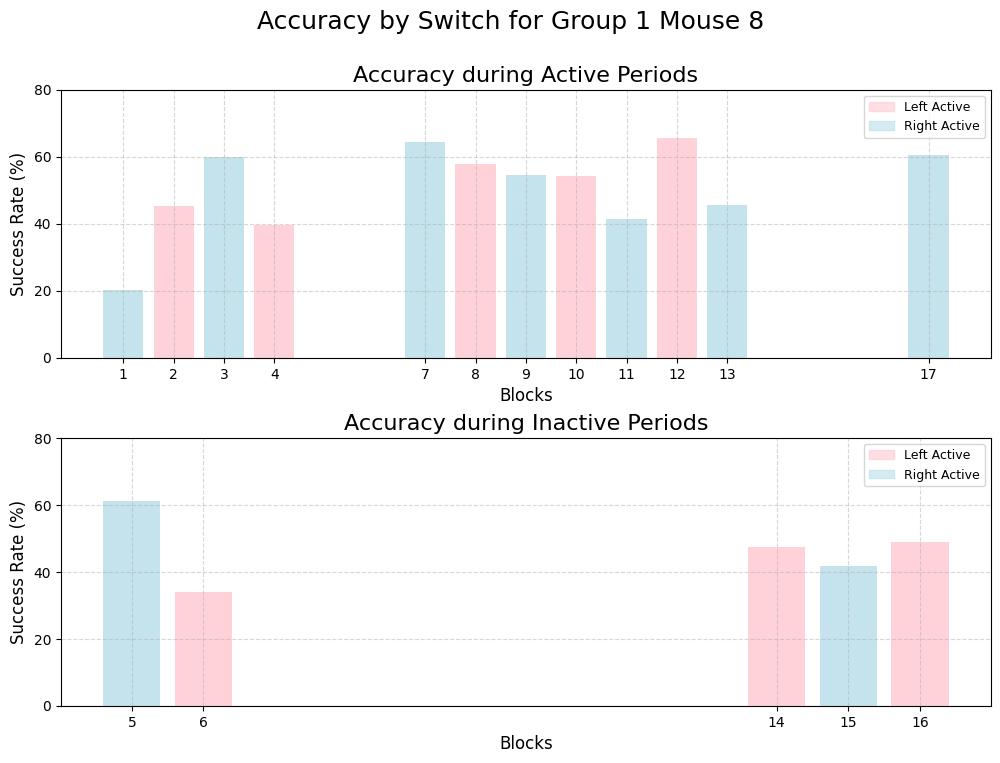

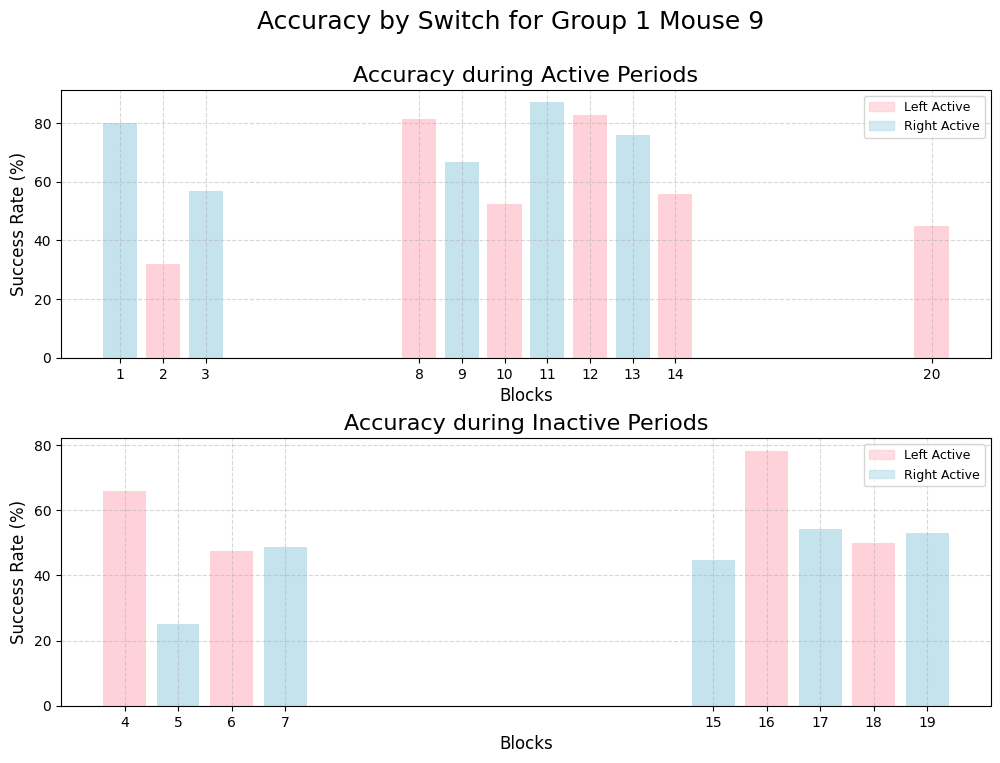

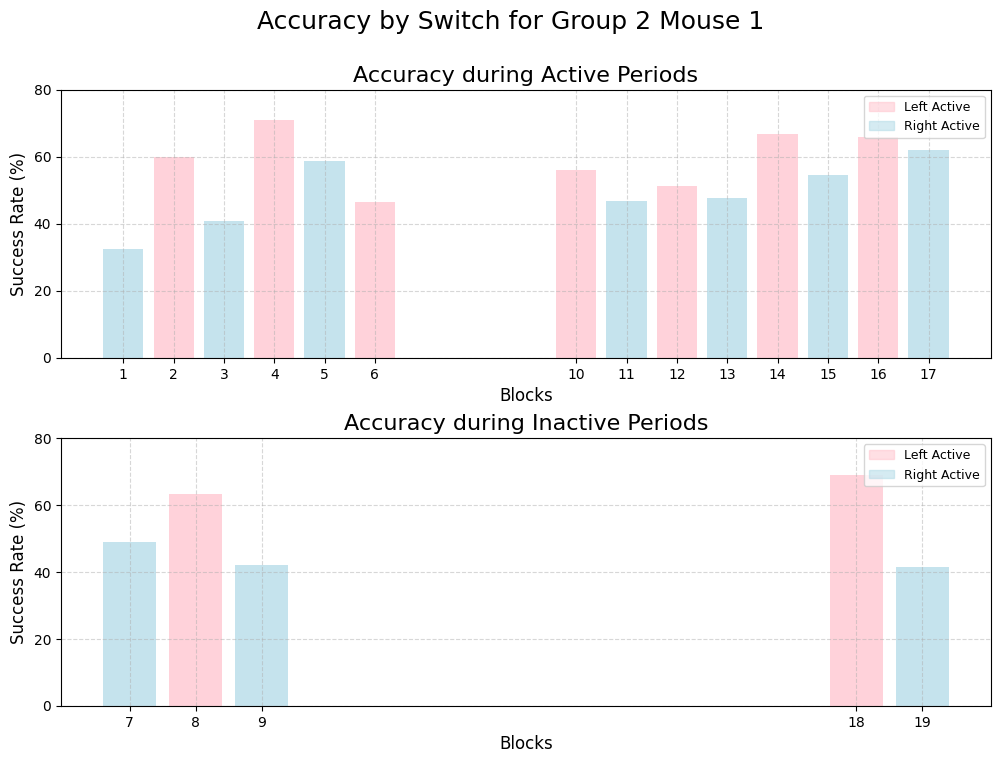

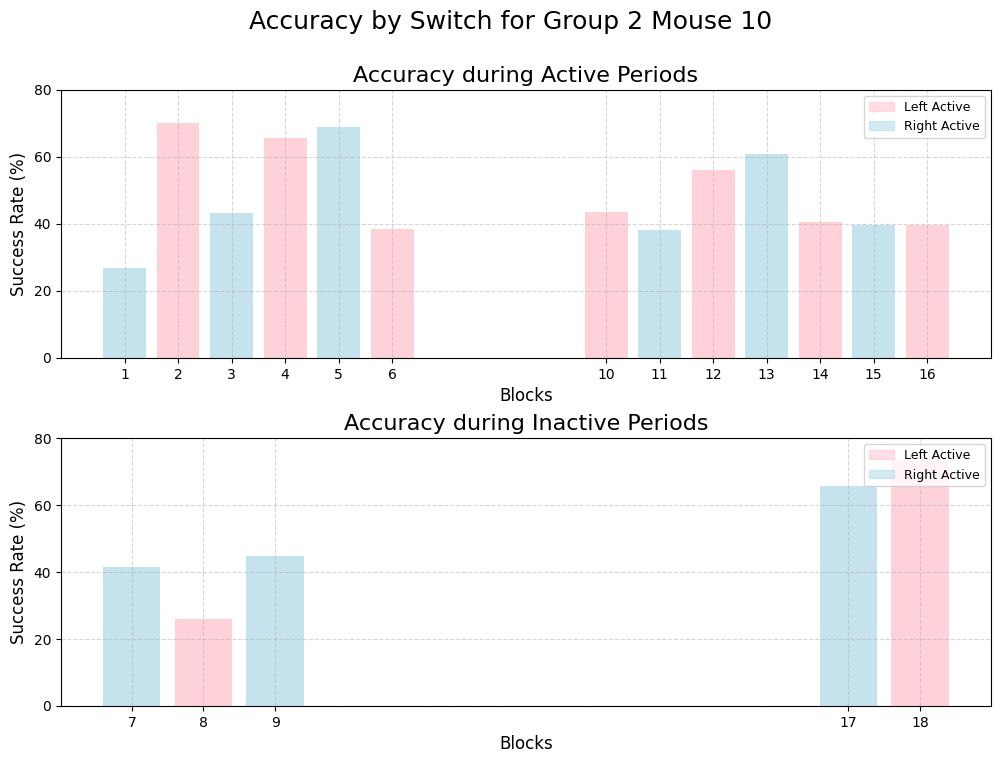

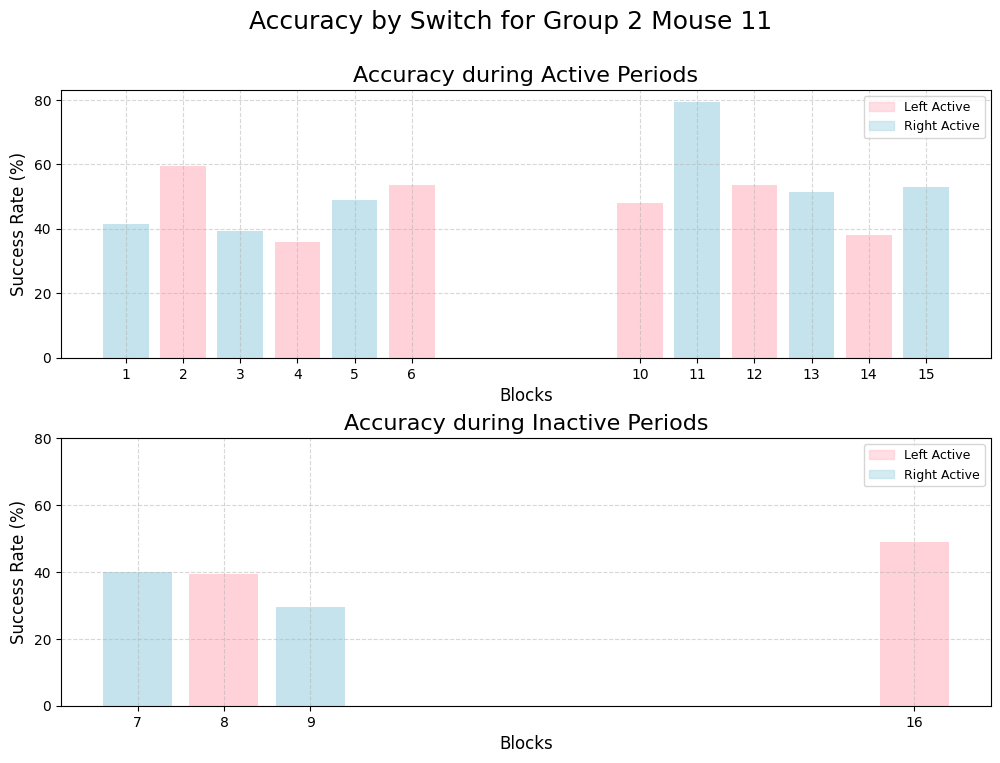

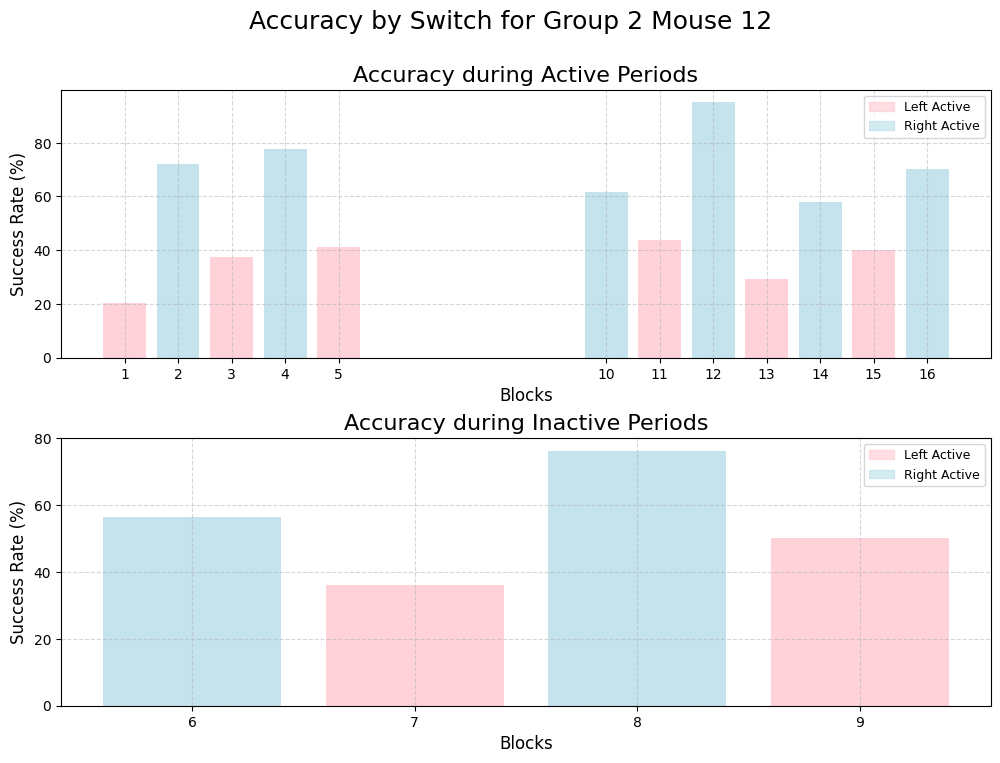

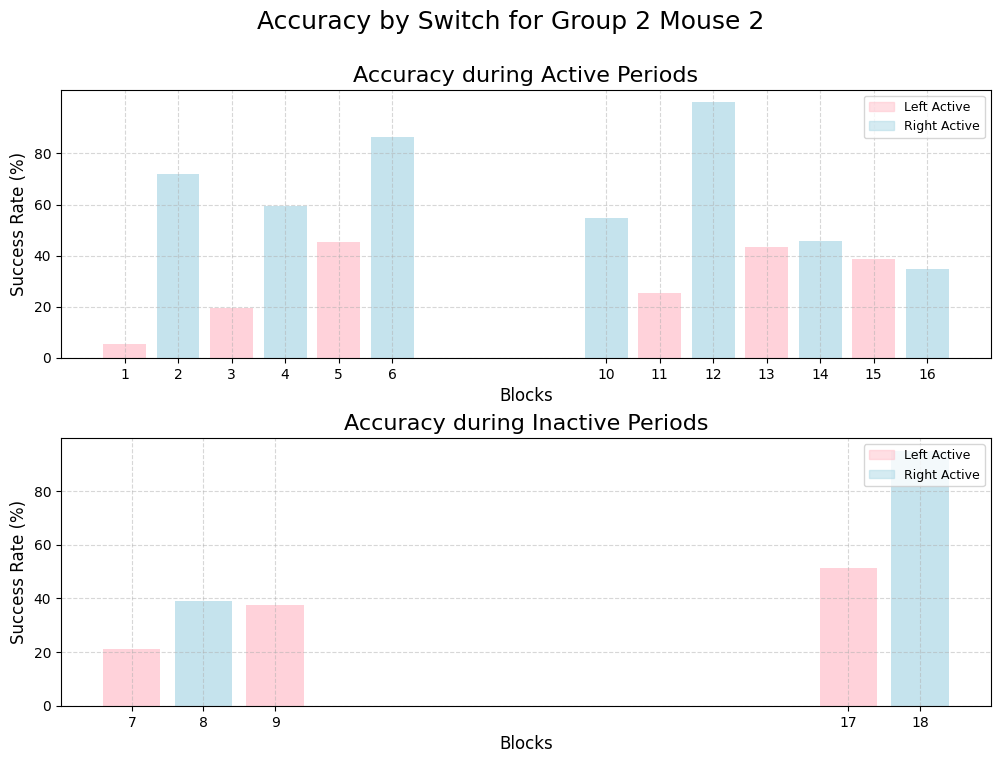

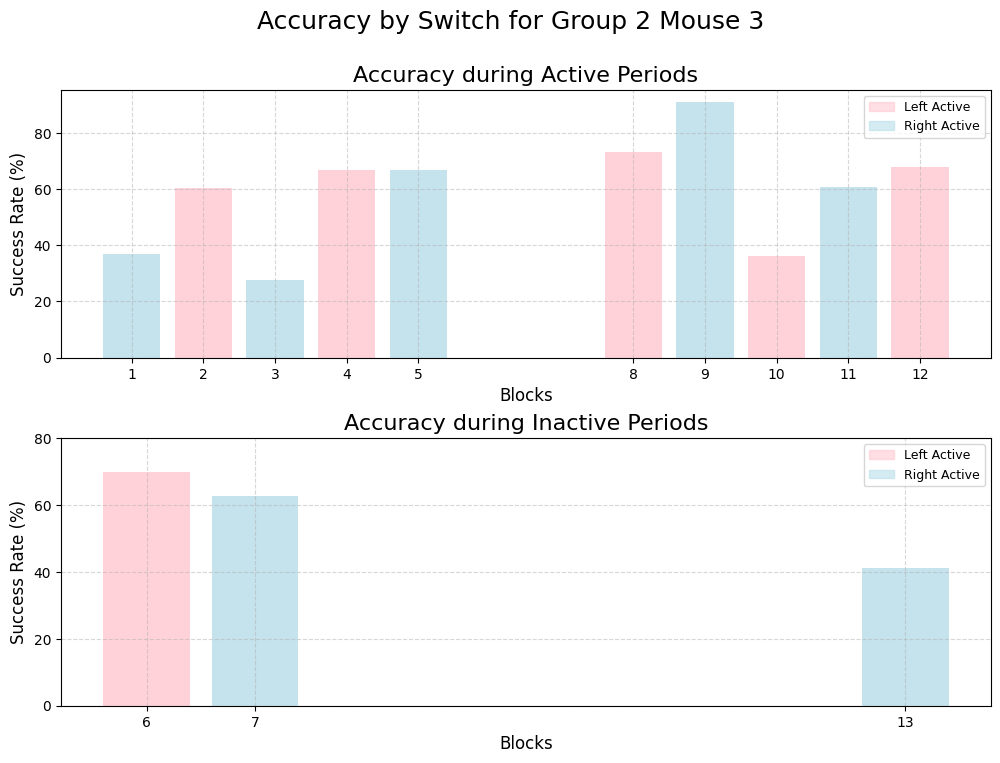

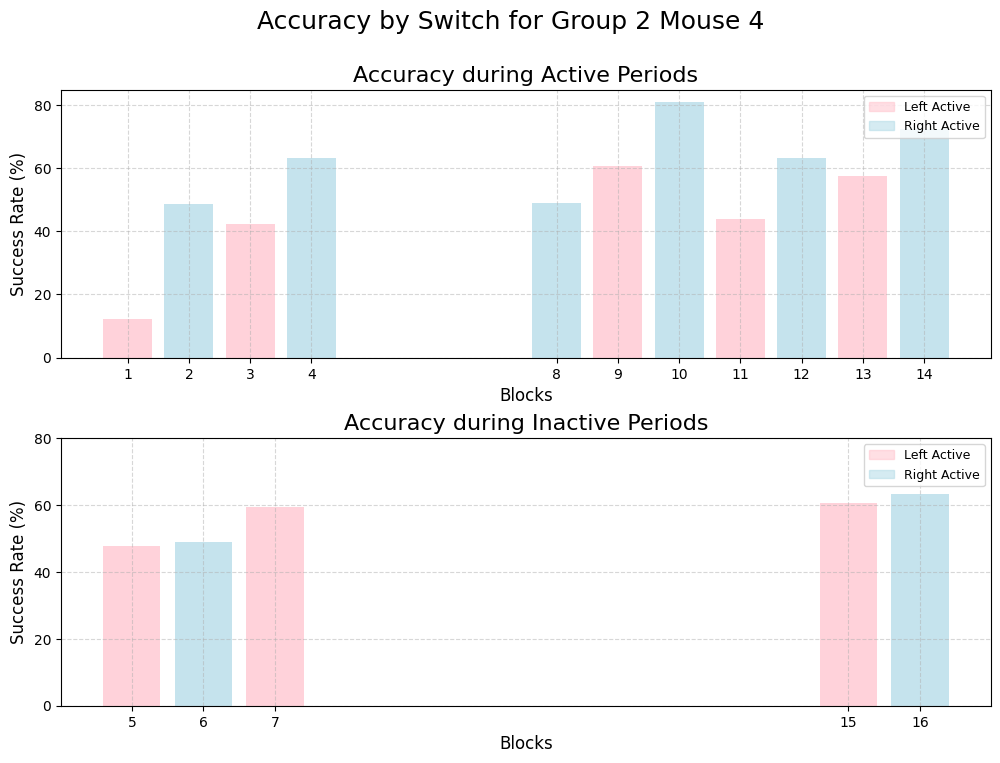

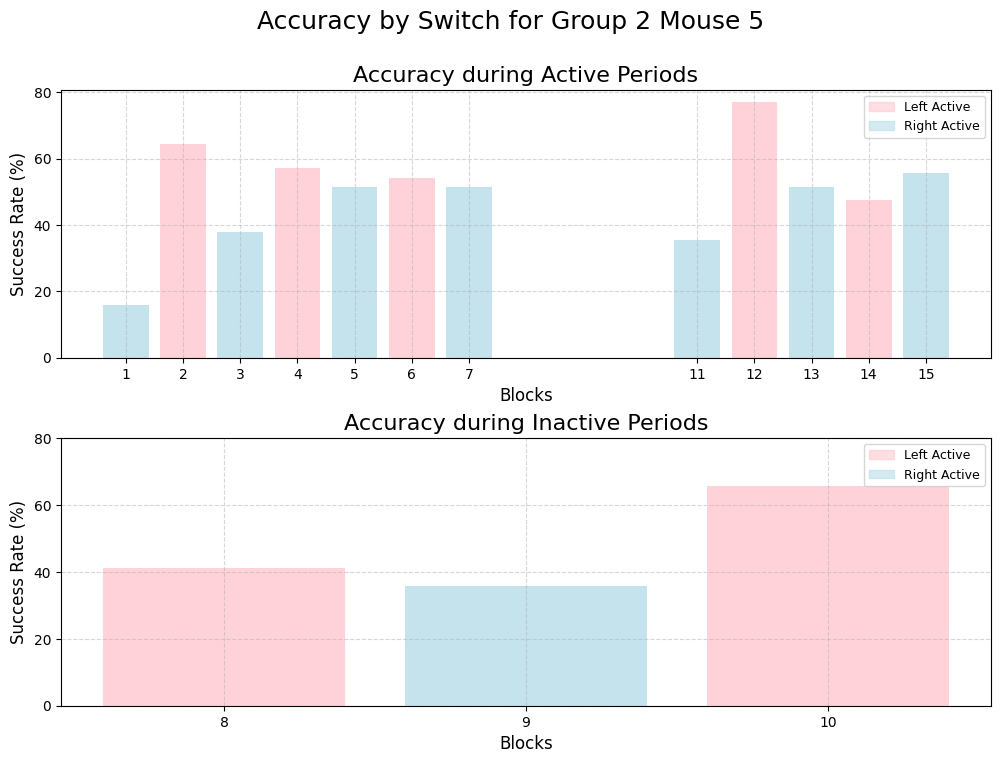

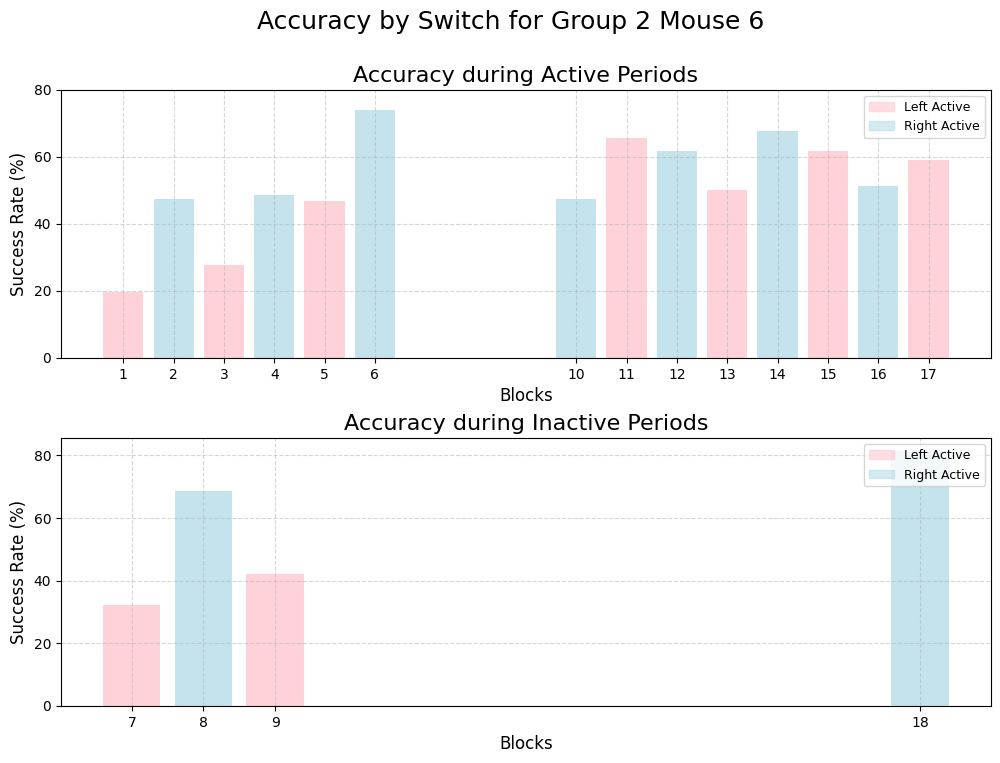

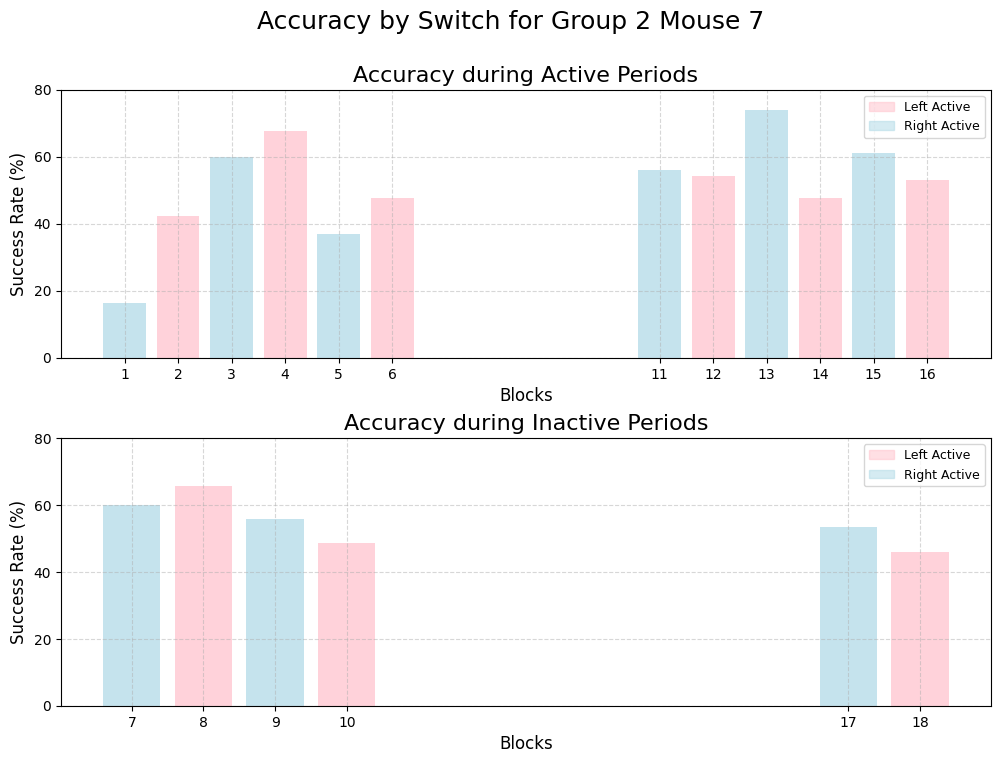

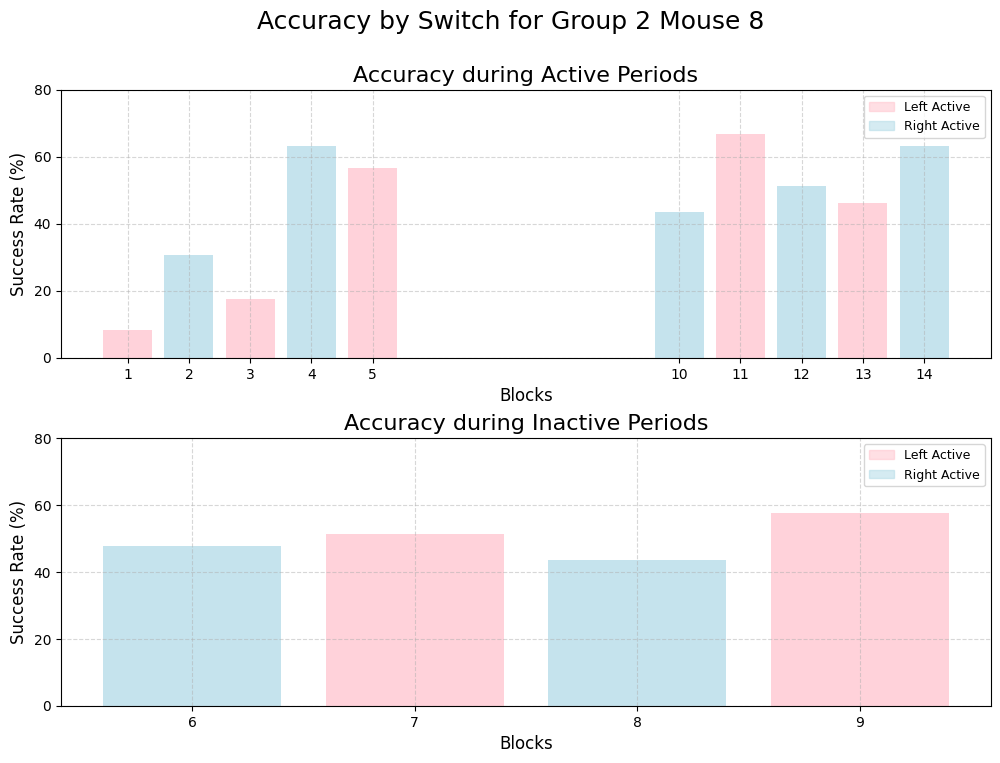

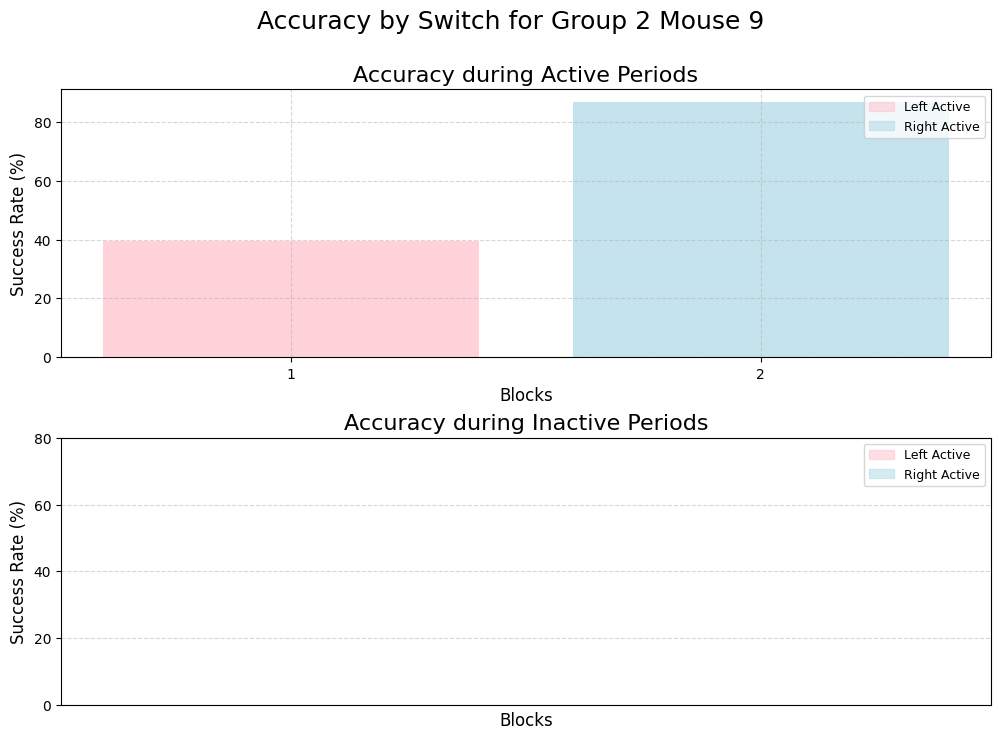

In [2]:
male_learning_result = []
male_scores = []

for sheet in rev_male_sheets[:]:
    data = read_excel_by_sheet(sheet, rev_male_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data, day=day)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    dit.graph_learning_trend_by_activity(data_stats, blocks, path=sheet, block_prop=block_prop, action_prop=action_prop, export_root=export_root)
    male_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    male_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

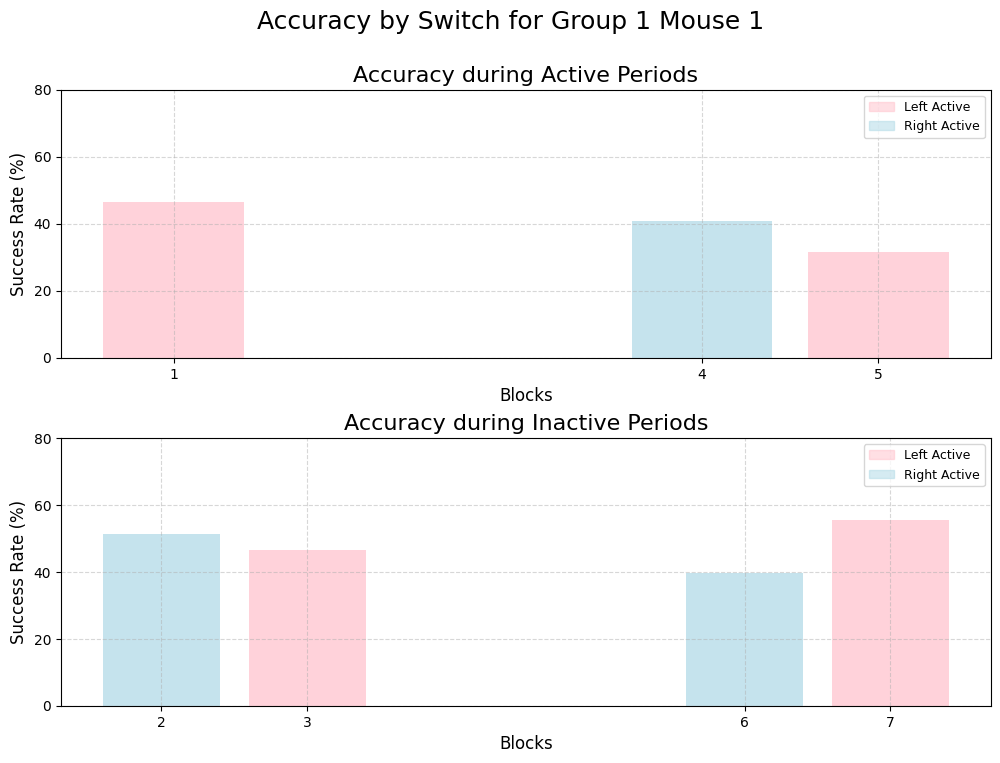

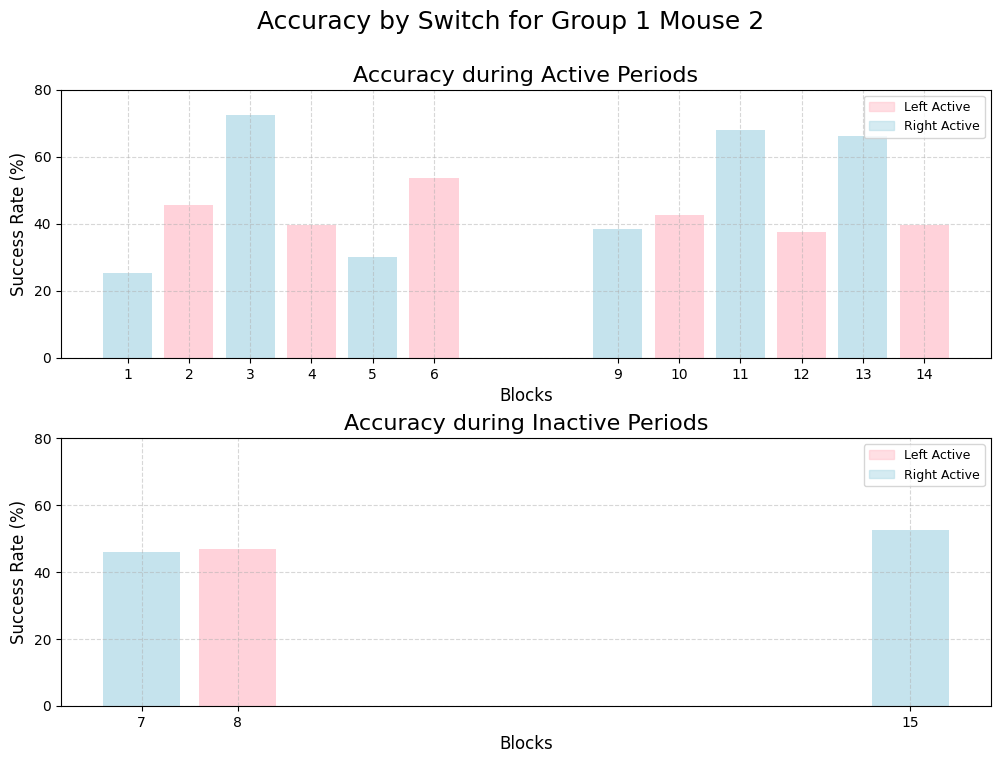

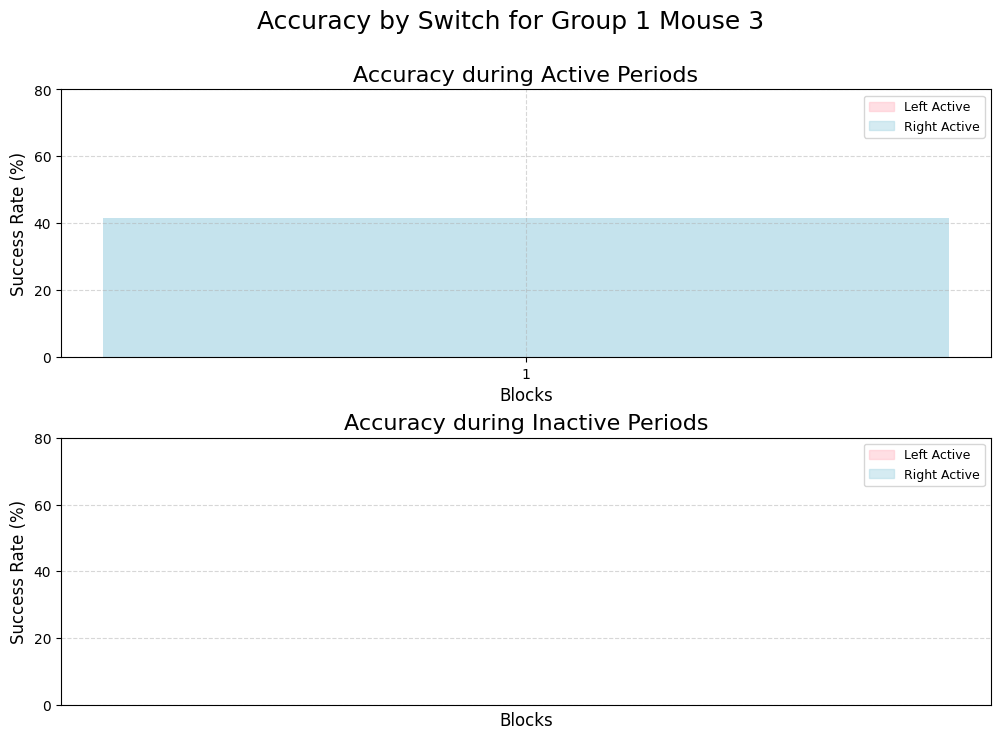

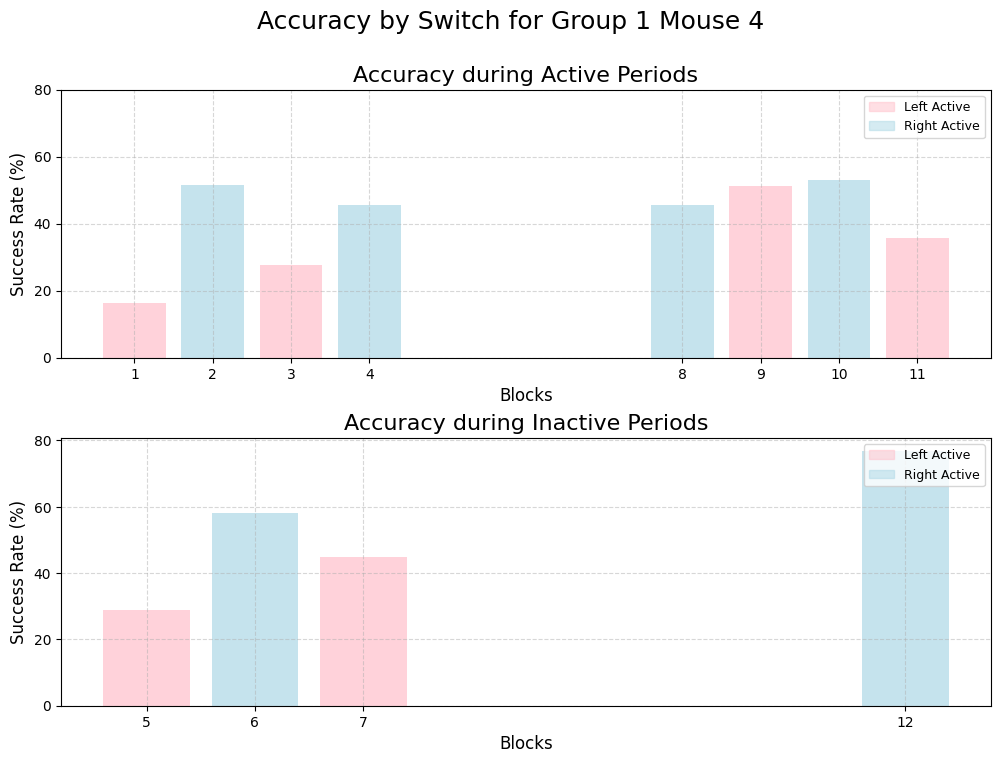

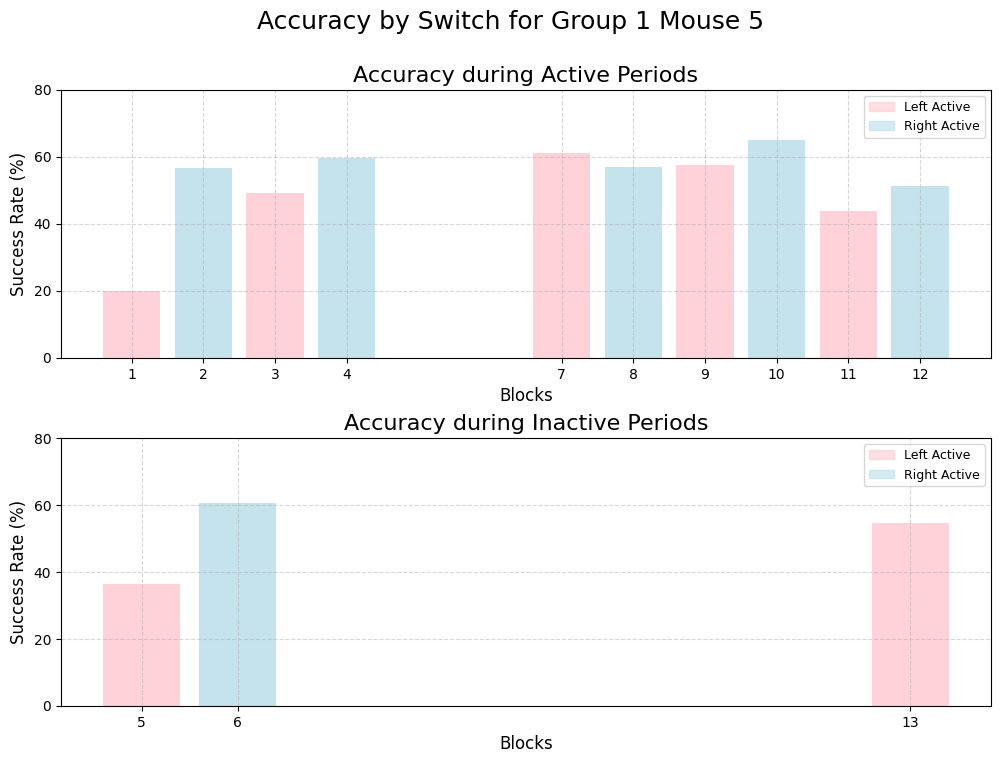

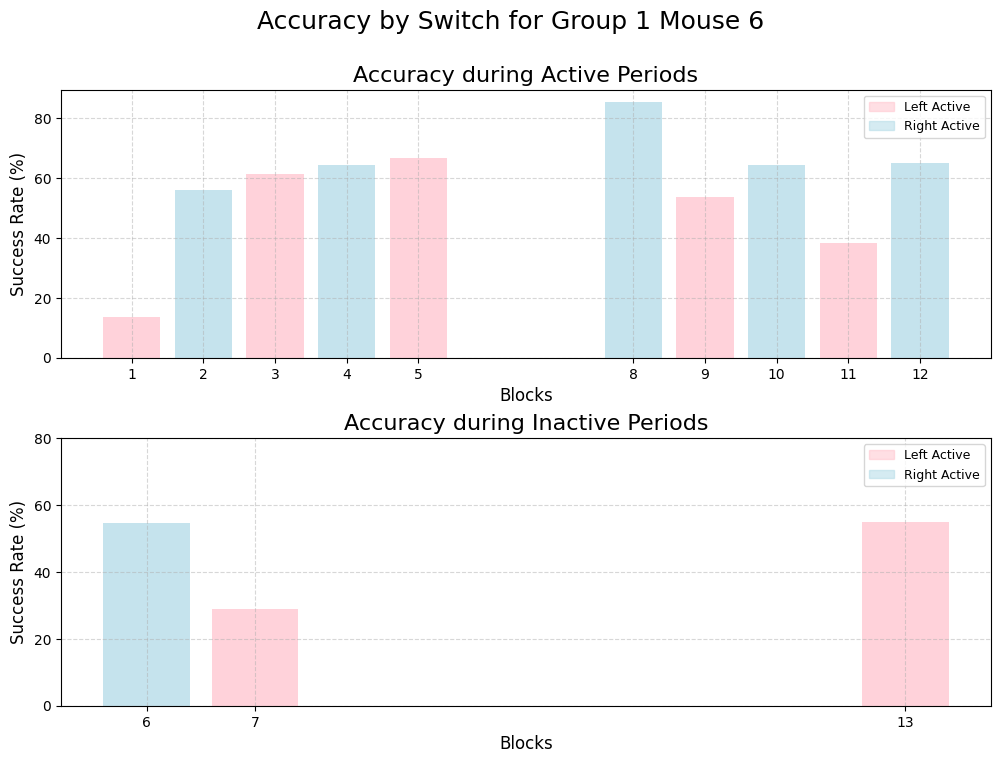

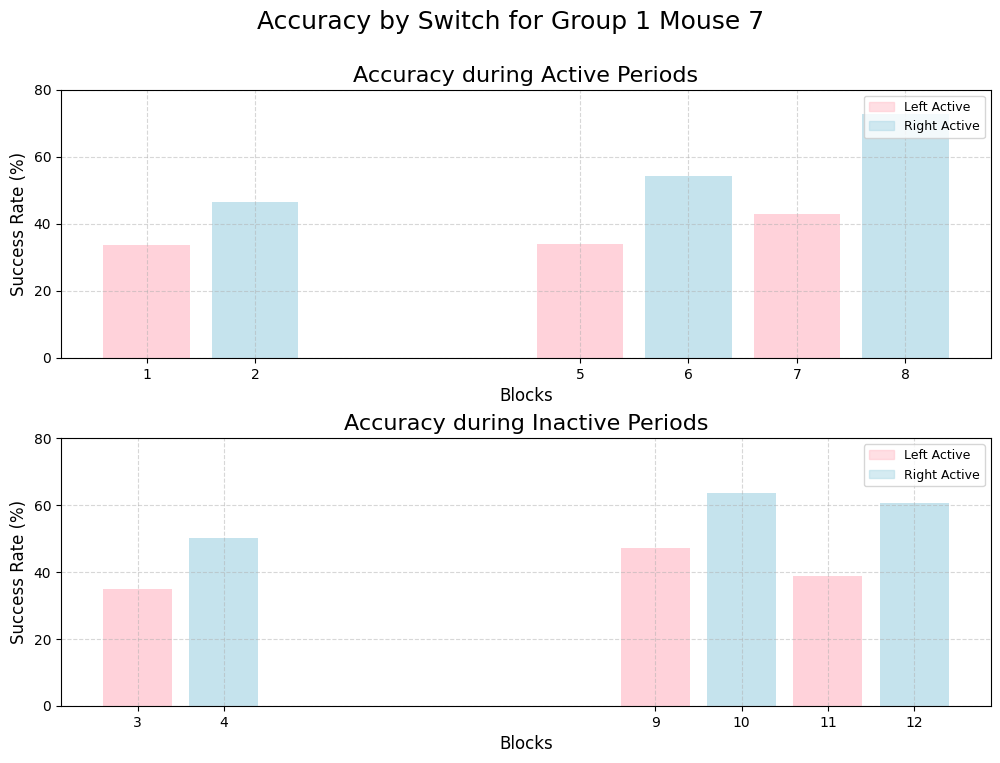

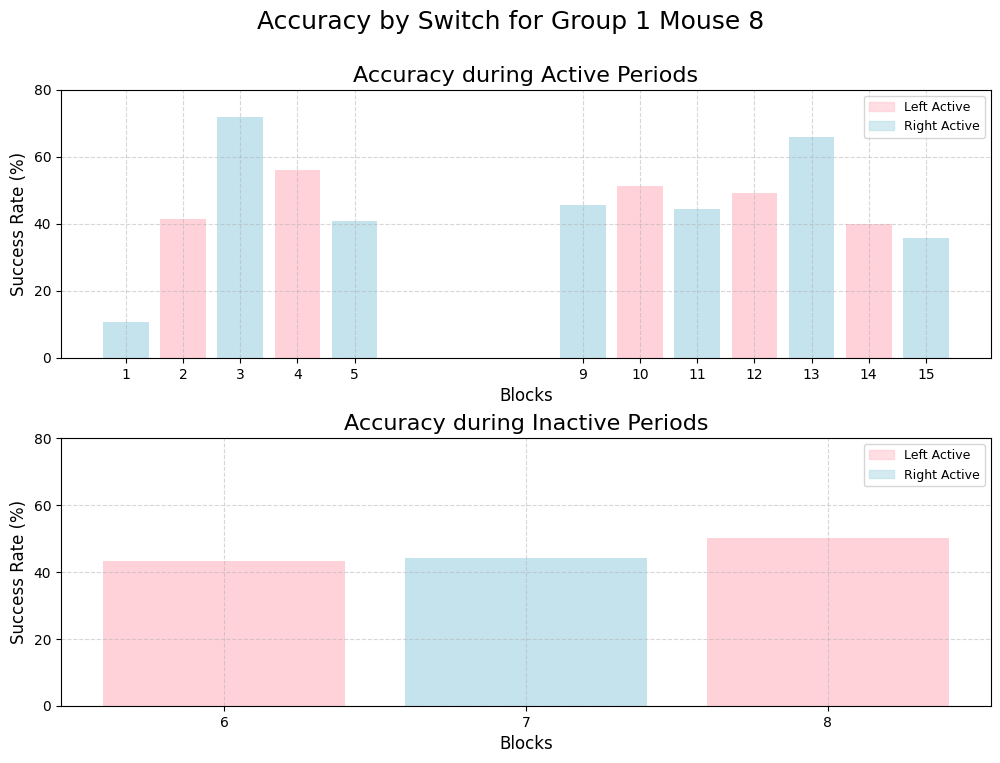

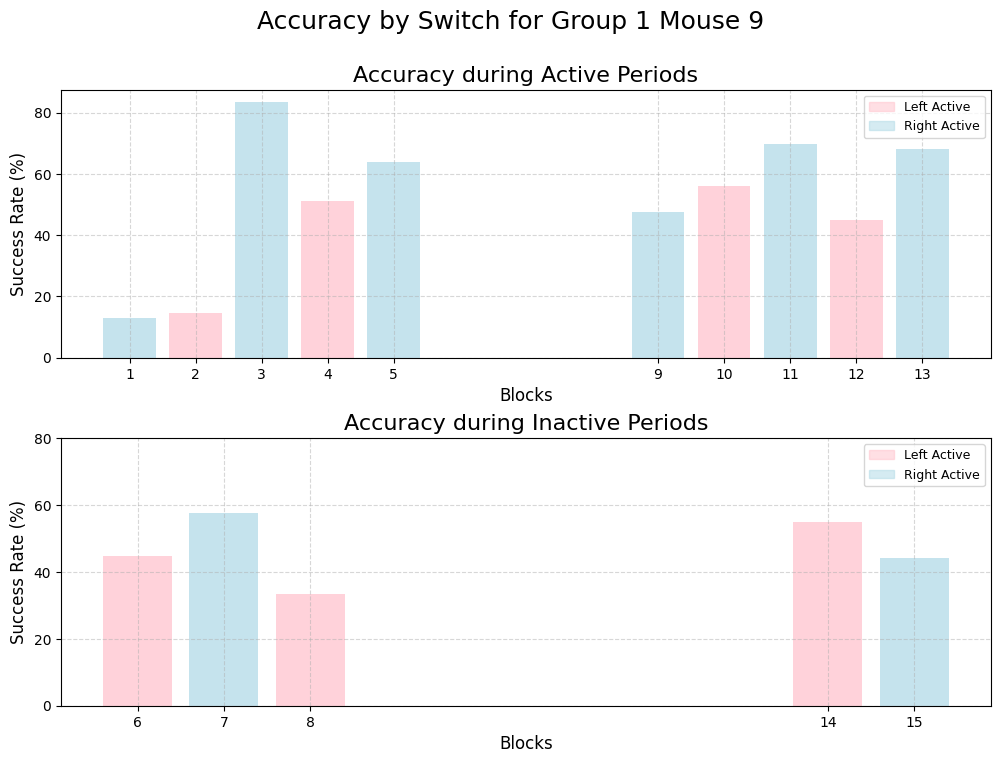

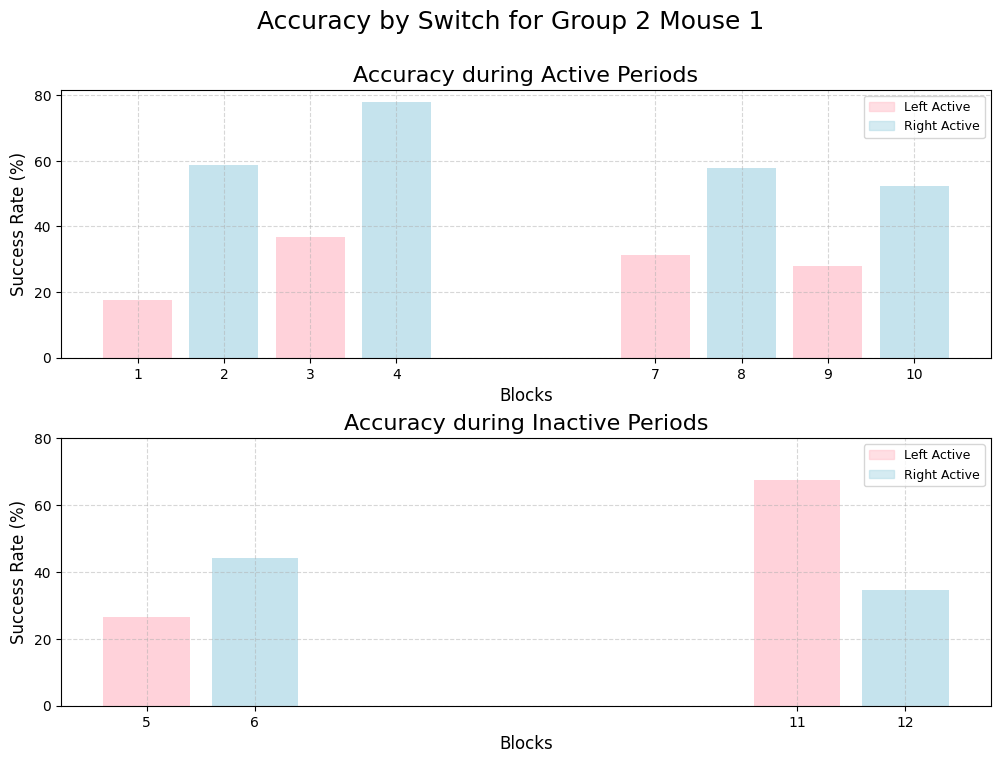

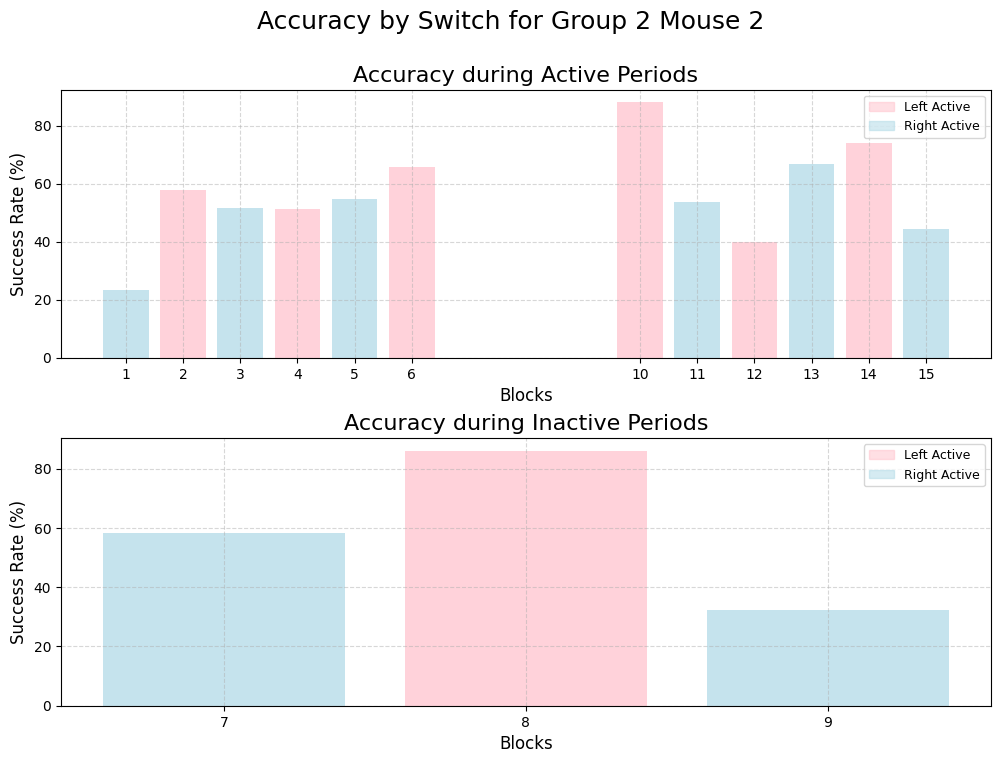

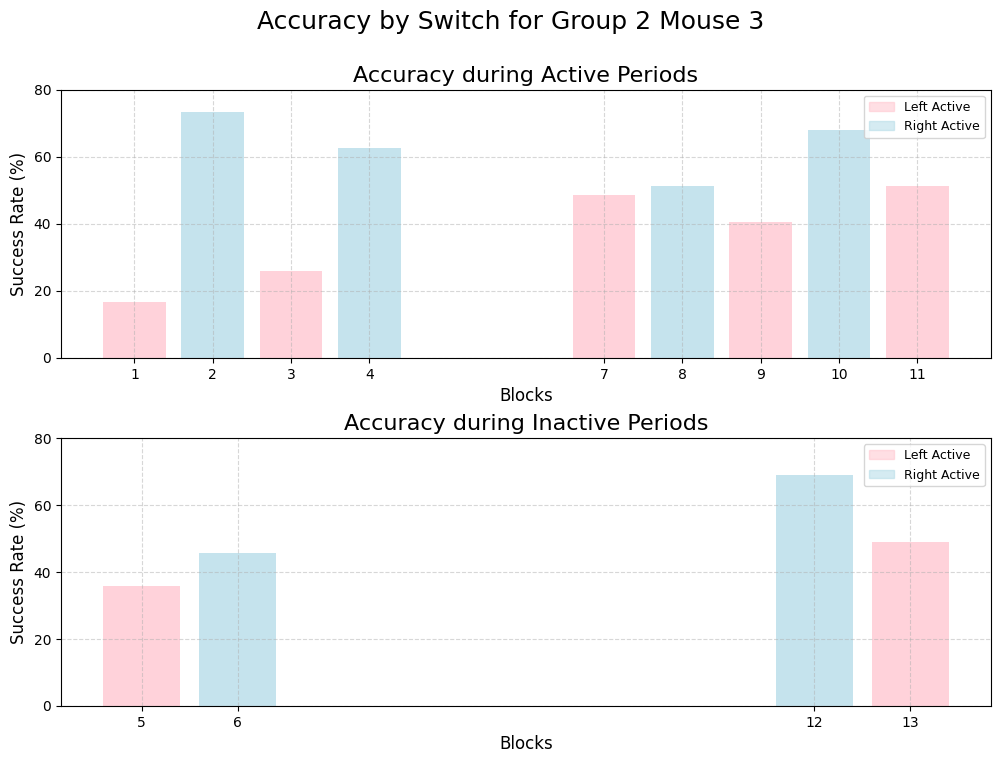

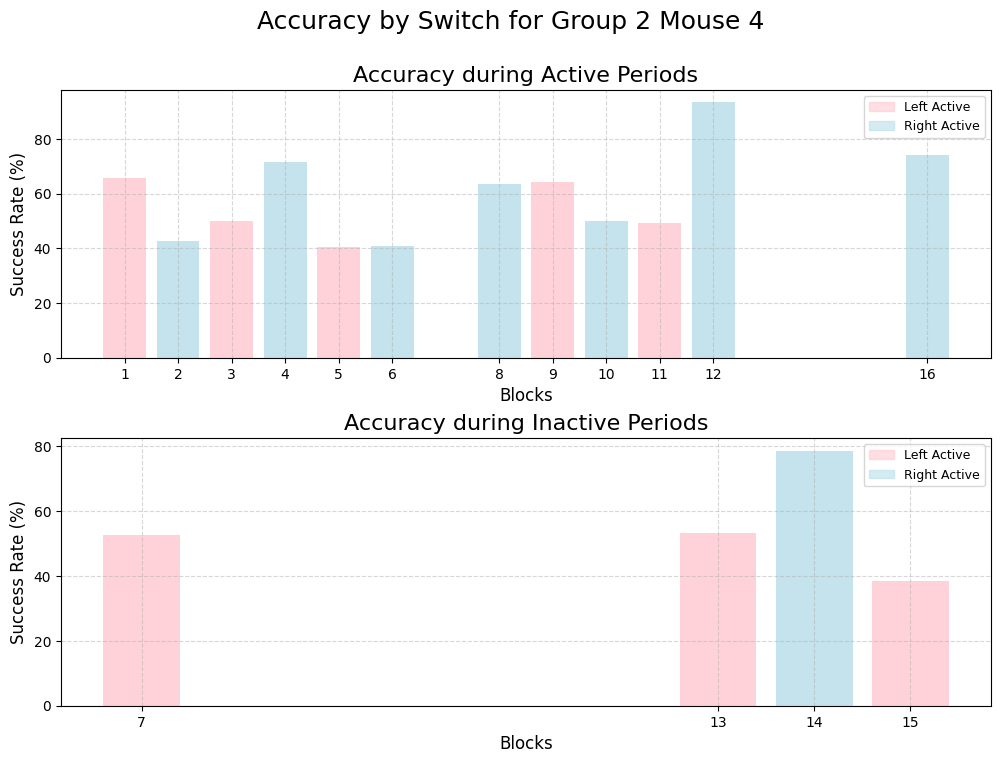

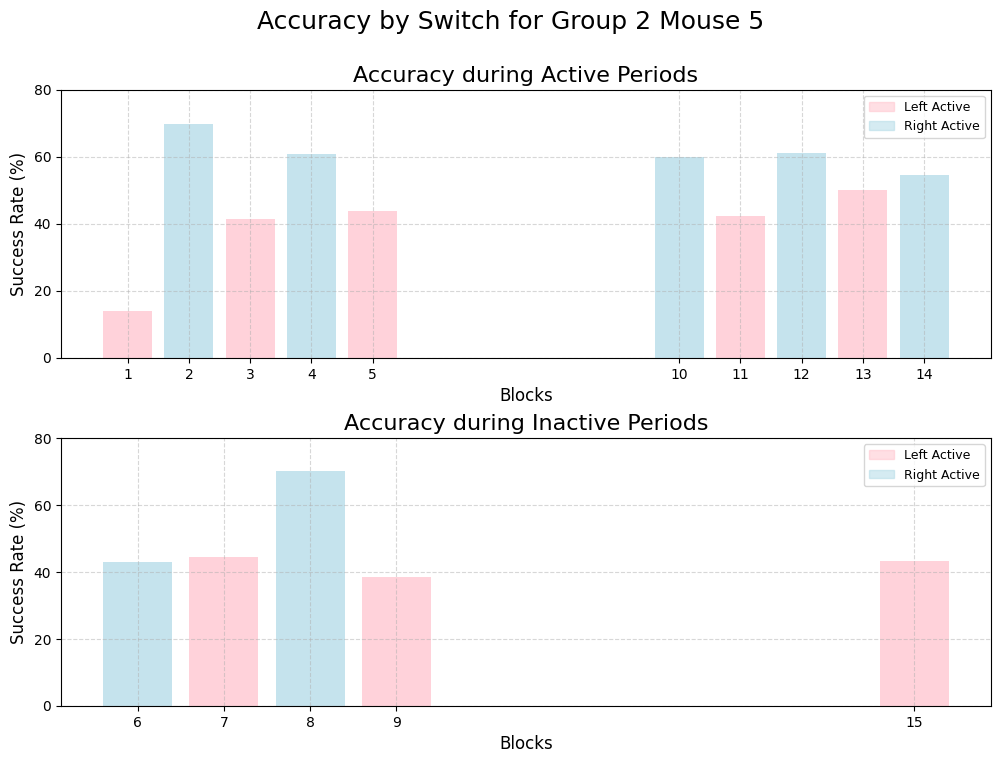

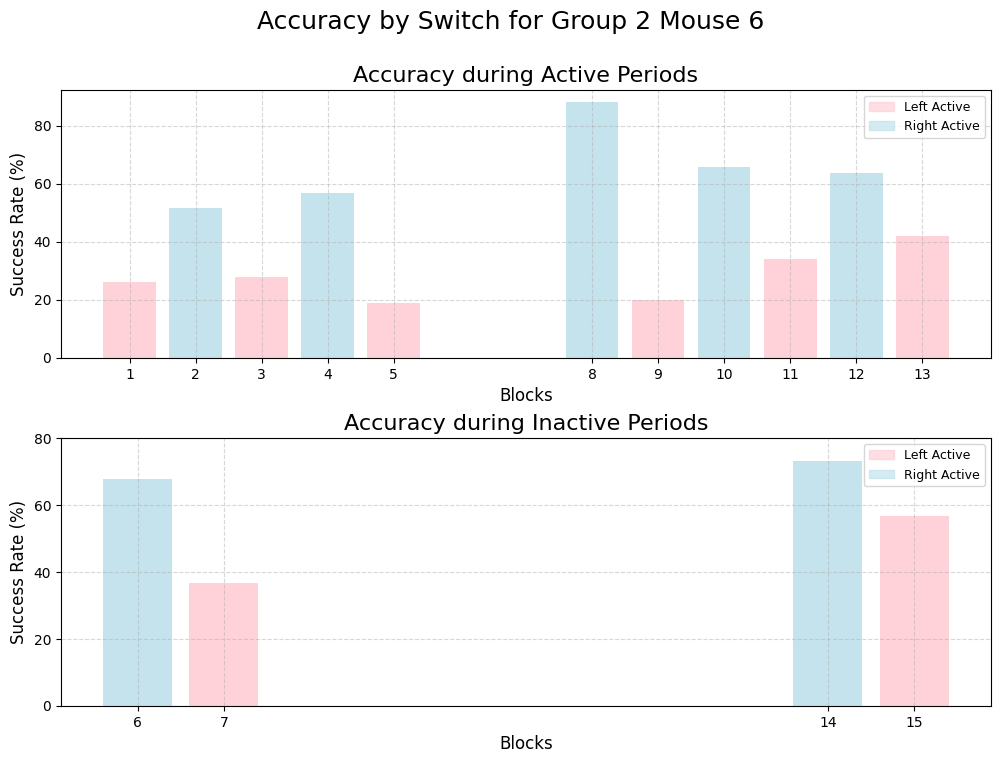

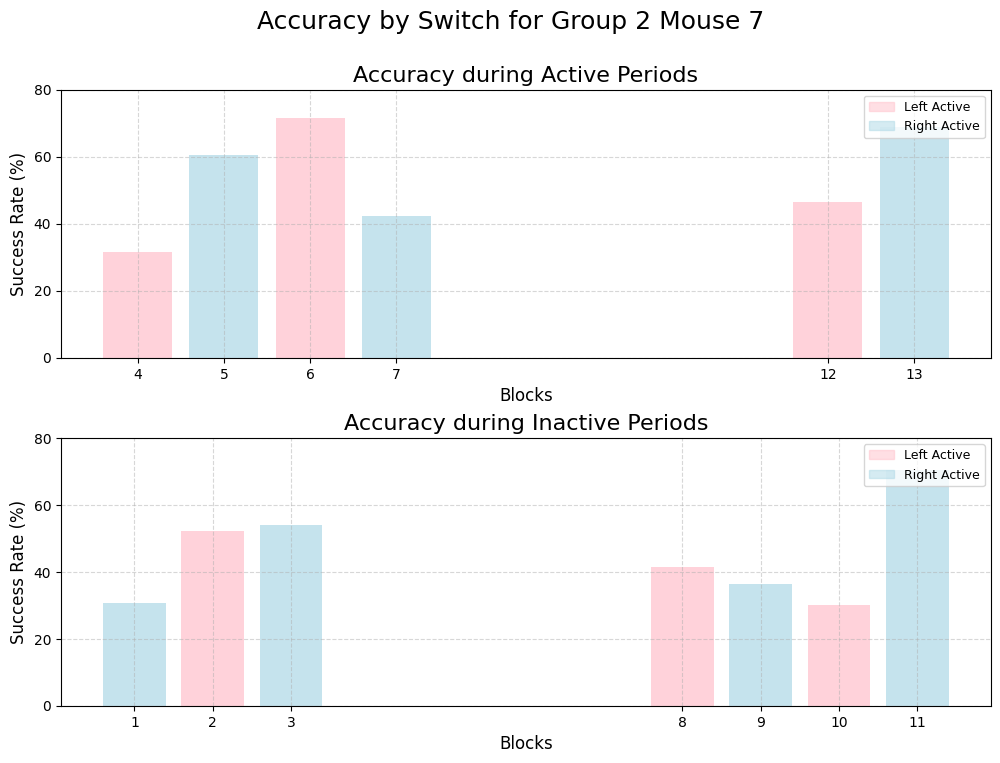

In [3]:
female_scores = []
female_learning_result = []

for sheet in rev_female_sheets:
    data = read_excel_by_sheet(sheet, rev_female_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data, day=day)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    dit.graph_learning_trend_by_activity(data_stats, blocks, path=sheet, block_prop=block_prop, action_prop=action_prop, export_root=export_root)
    female_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    female_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

In [4]:
perform_T_test(male_scores, female_scores, test_side='two-sided')

P Value is  0.002024513780566296
There is a significant difference between the two groups.


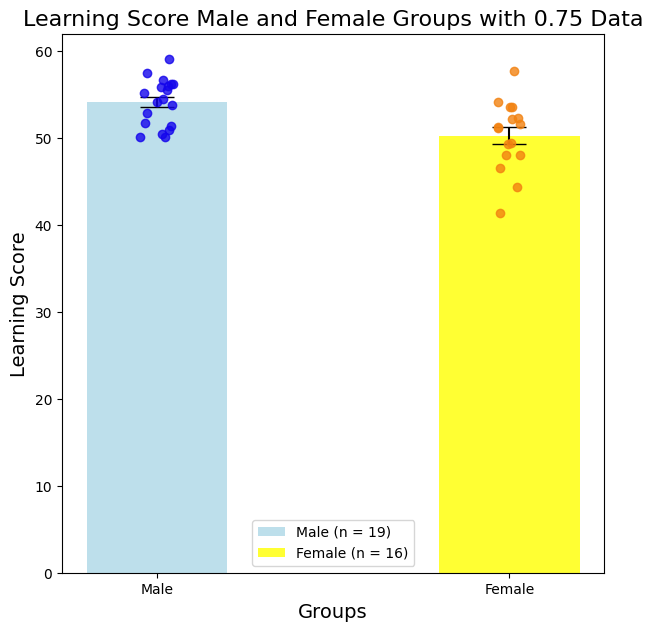

In [5]:
dit.graph_learning_score(male_scores, female_scores, group_names=['Male', 'Female'], proportion=action_prop, export_path=export_root)

In [6]:
perform_T_test(male_learning_result, female_learning_result, test_side='two-sided')

P Value is  0.041596476805250755
There is a significant difference between the two groups.


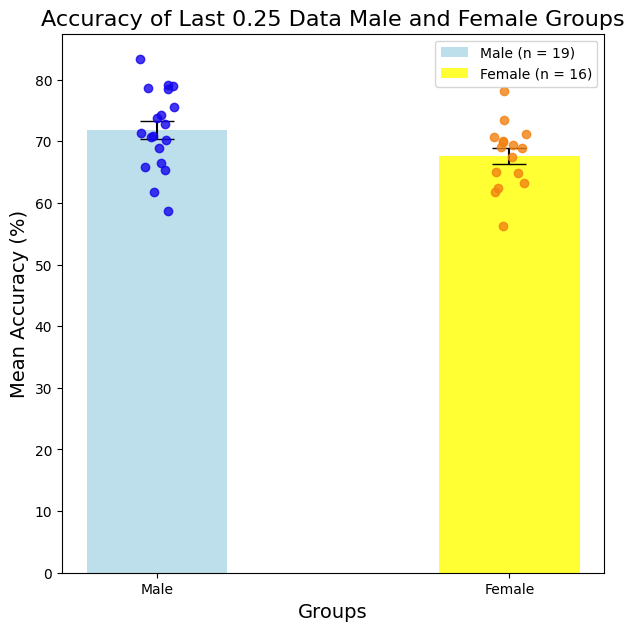

In [7]:
dit.graph_learning_results(male_learning_result, female_learning_result, proportion=0.25, group_names=['Male', 'Female'])

### Pellet Collect Time

In [8]:
export_root = '../WT_export/Figure 3'

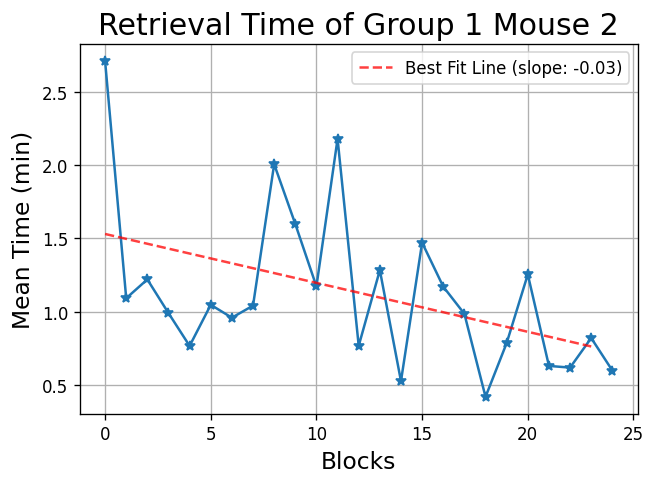

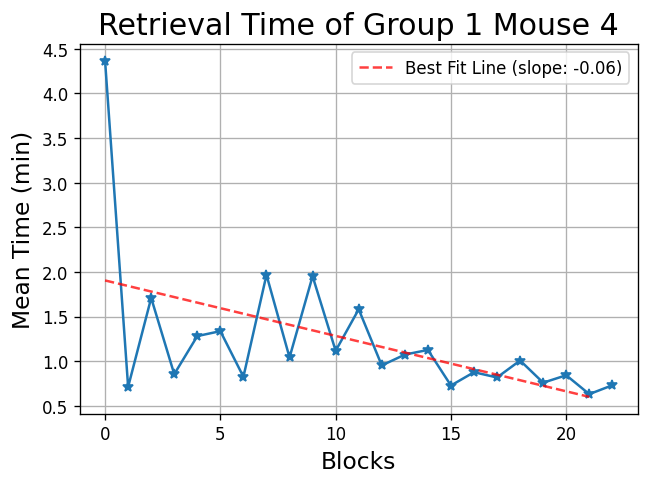

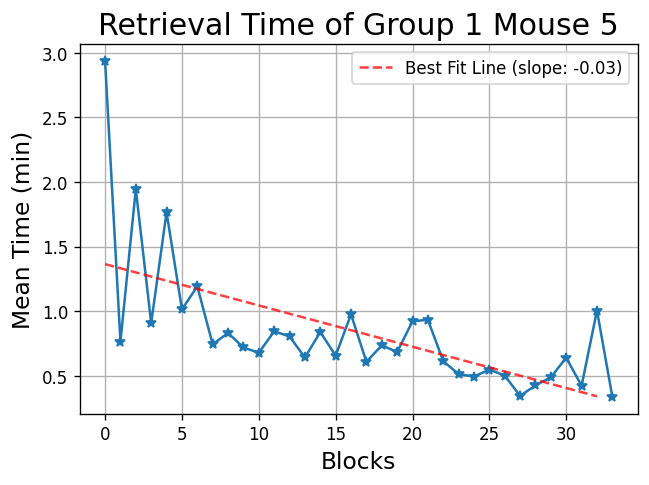

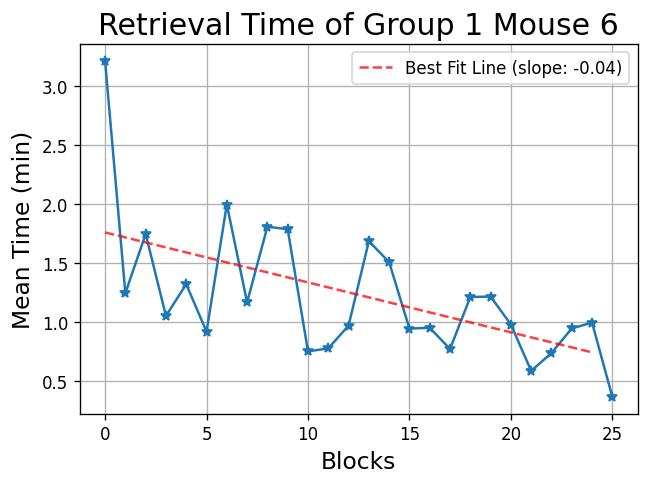

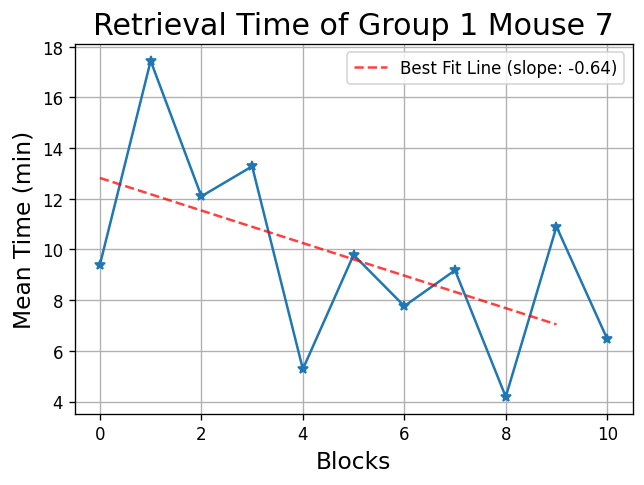

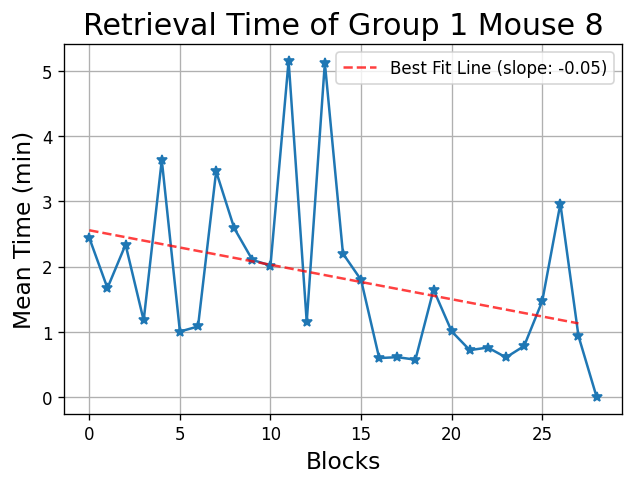

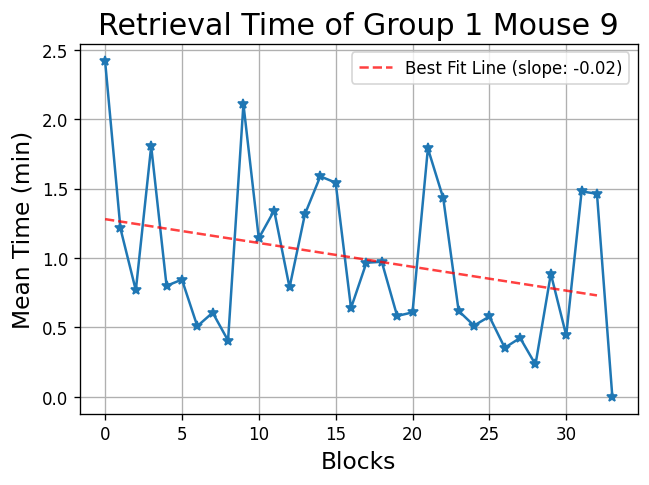

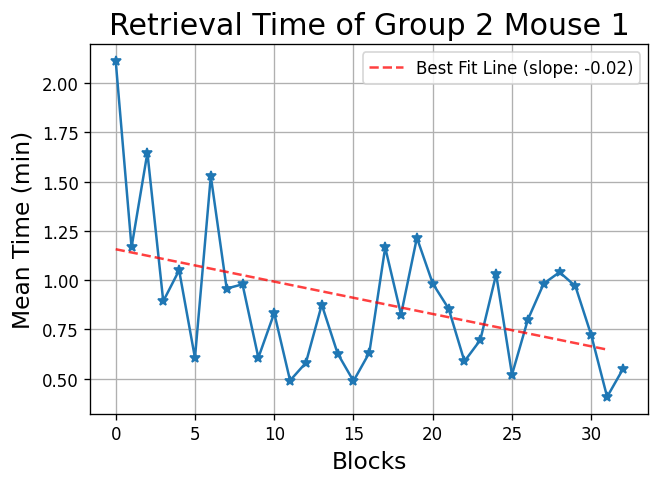

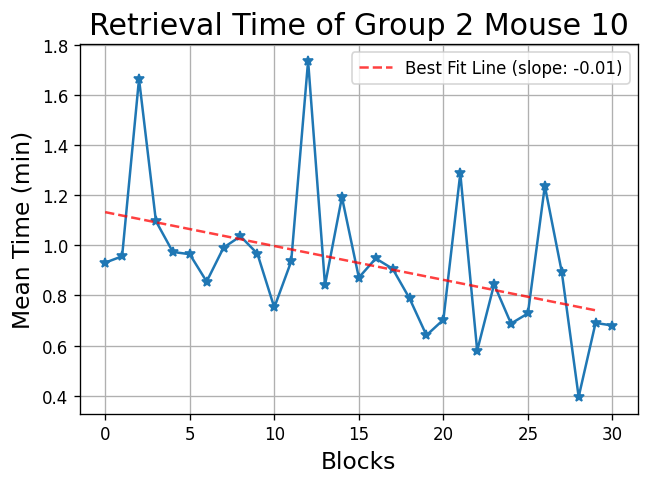

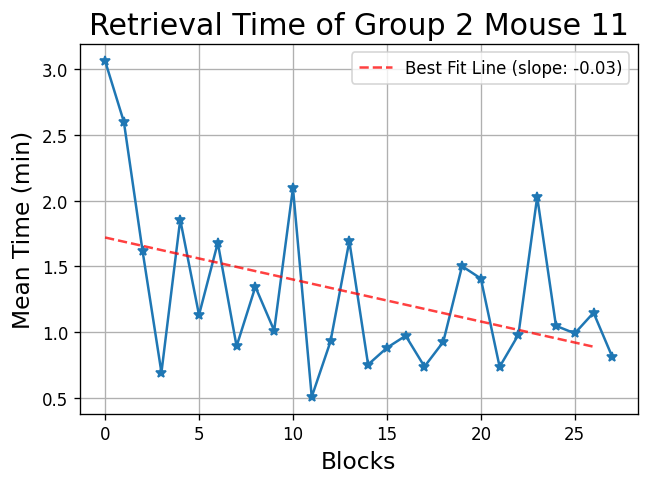

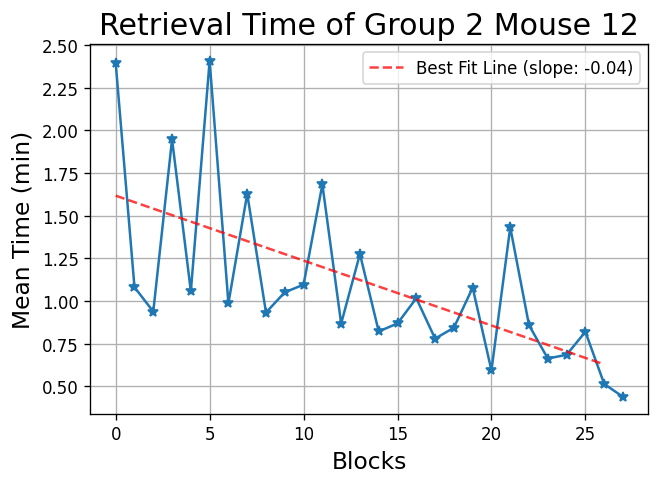

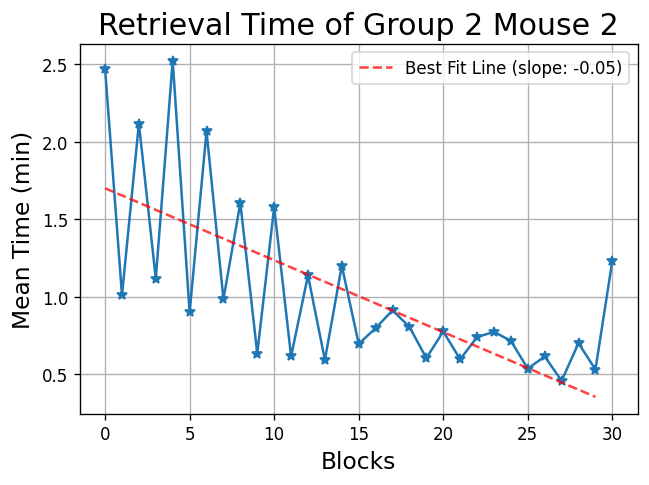

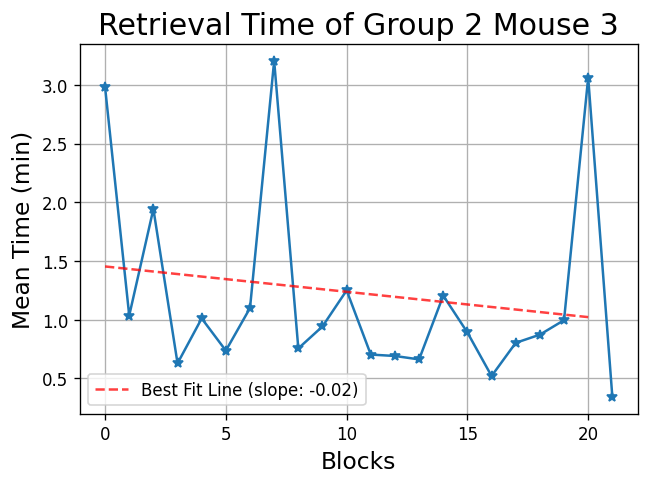

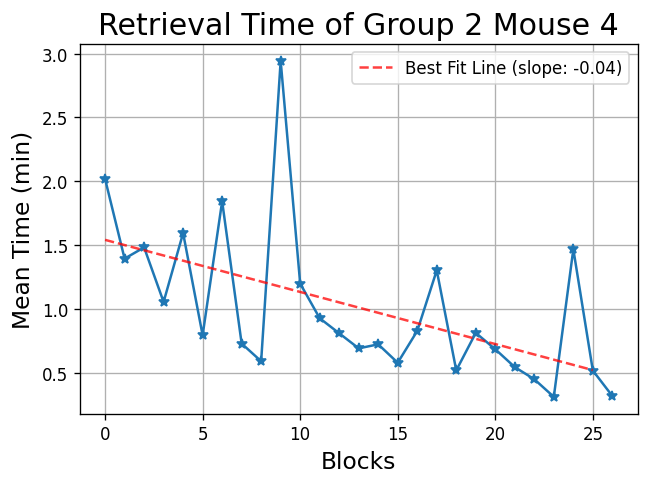

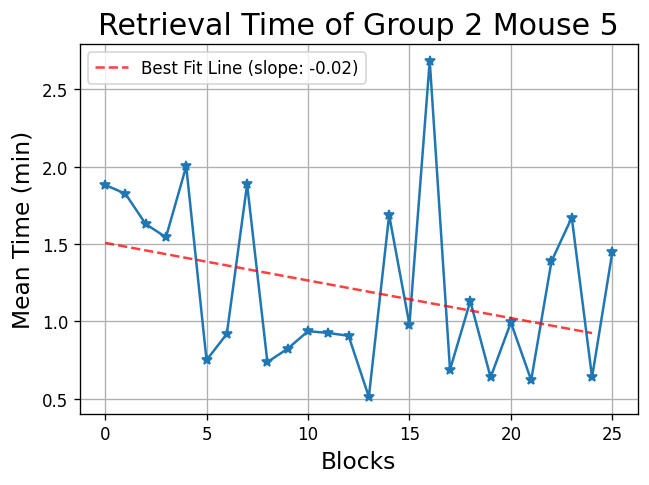

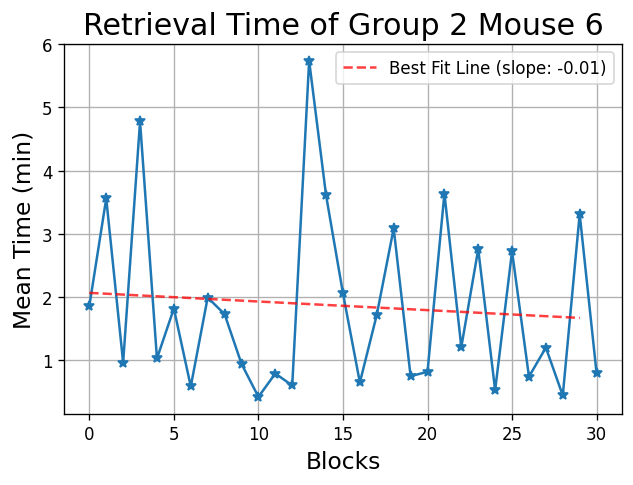

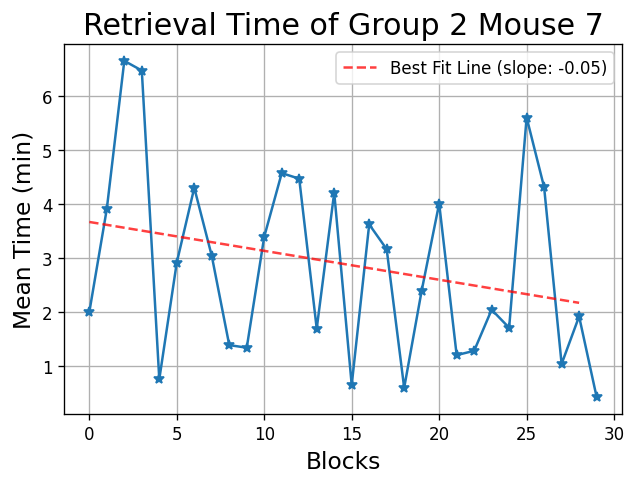

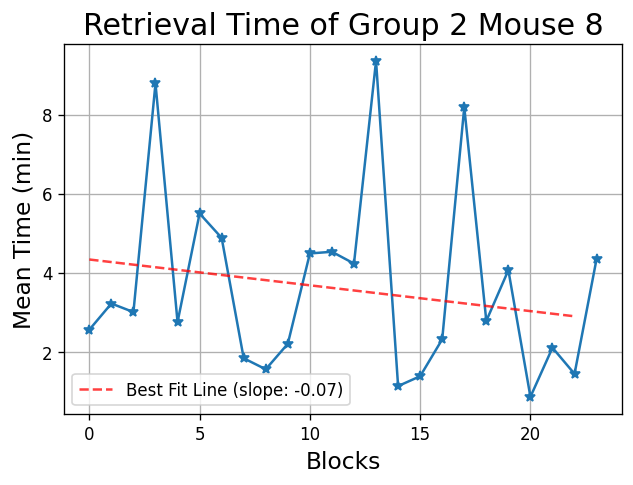

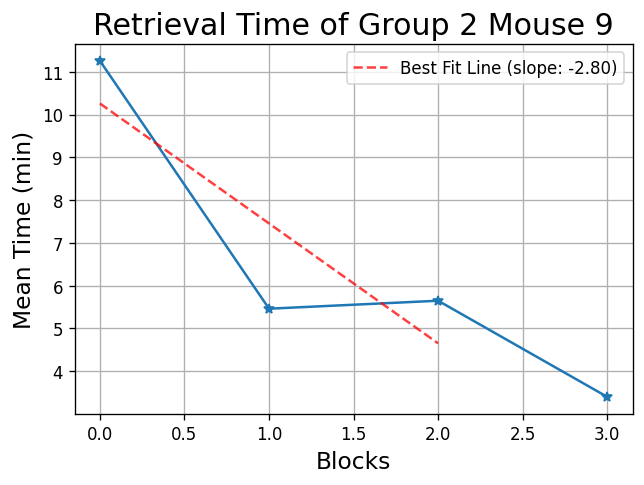

In [10]:
male_all_times = []
male_mean = []
male_pred = []
male_slope = []
rev_male_time_dict = {}

for sheet in rev_male_sheets[:]:
    times, mean, std = mean_pellet_collect_time(rev_male_path, sheet, remove_outlier=True, n_stds=3, day=day)
    _, pred, slope = plot_retrieval_time_by_block(rev_male_path, sheet, day=day, n_stds=3, export_root=export_root)
    male_all_times.append(times)
    male_mean.append(mean)
    male_pred.append(pred)
    male_slope.append(slope)
    rev_male_time_dict[sheet] = mean

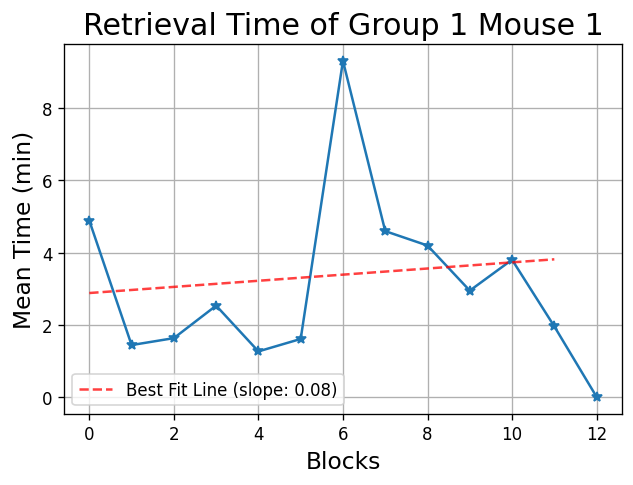

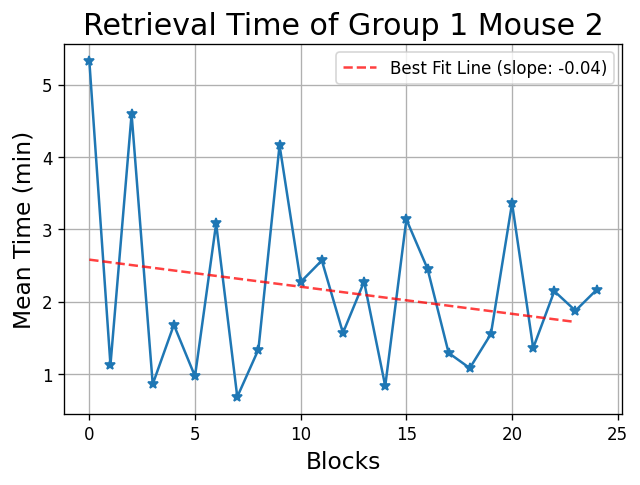

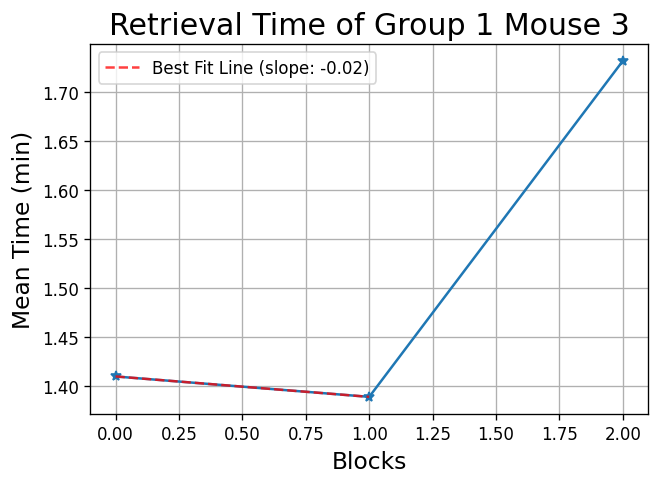

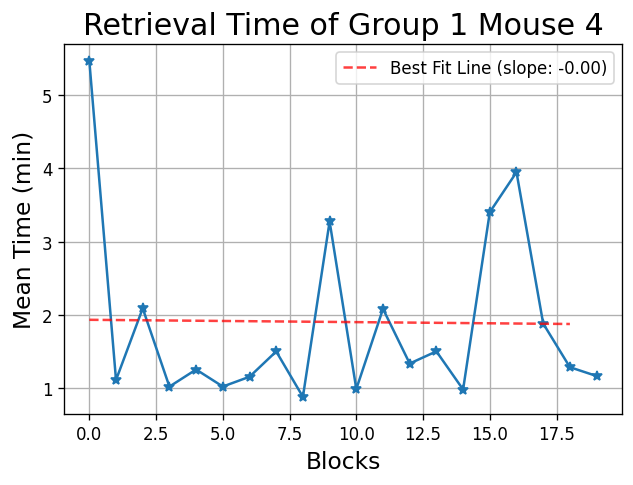

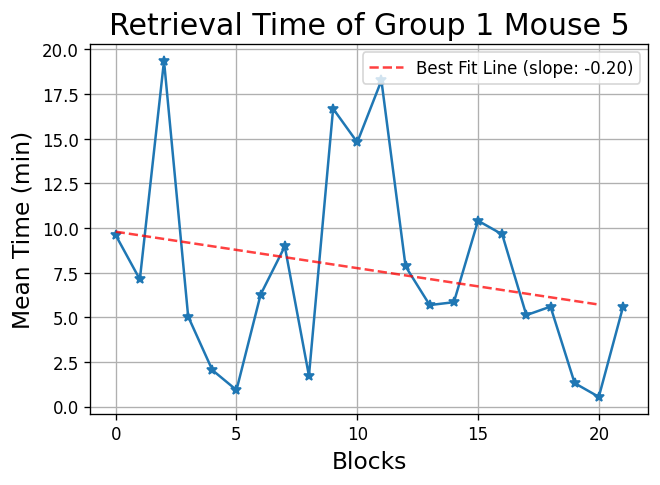

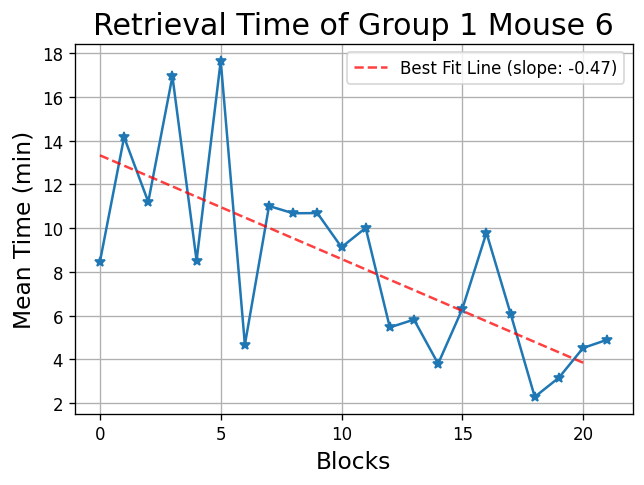

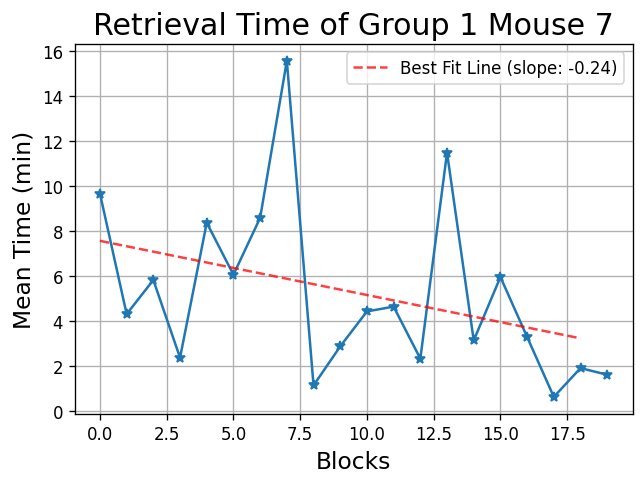

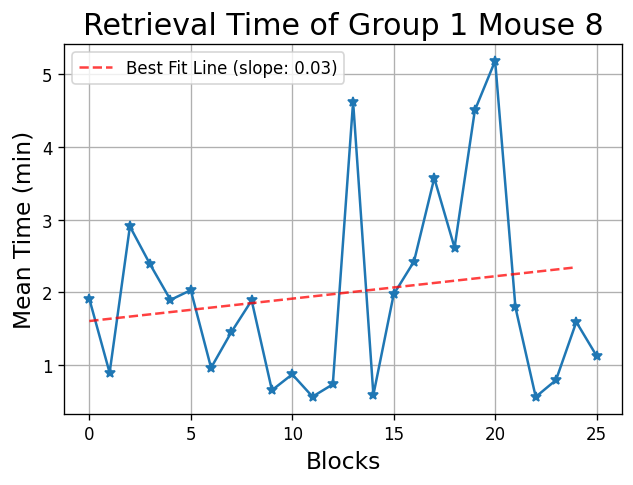

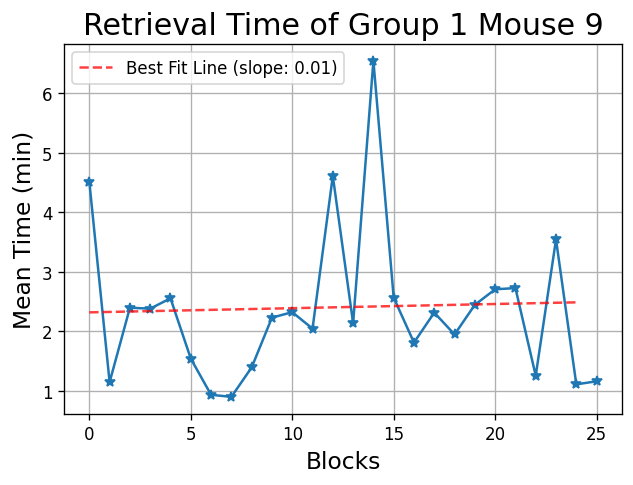

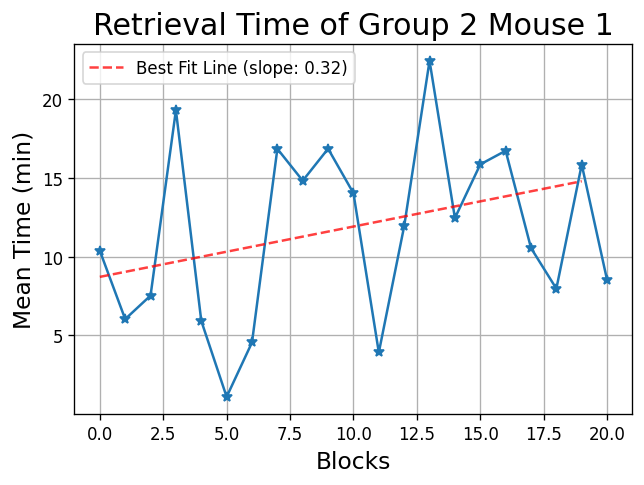

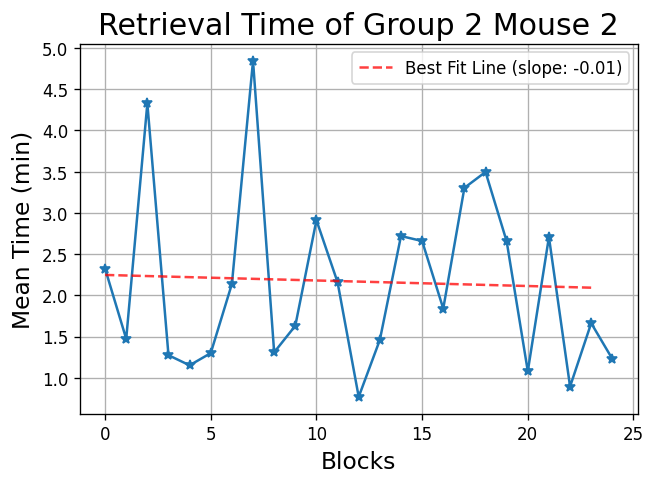

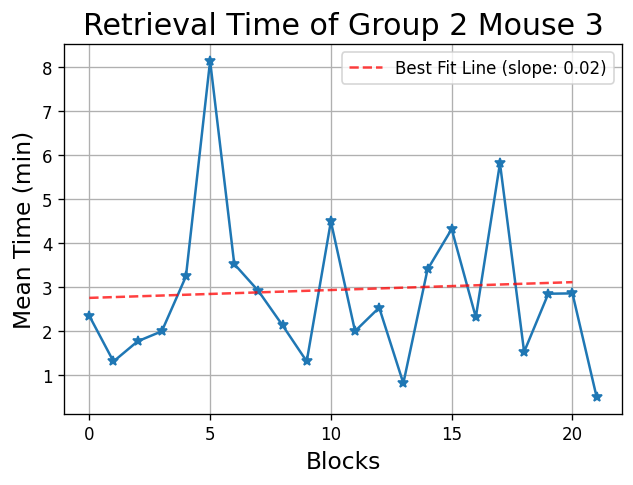

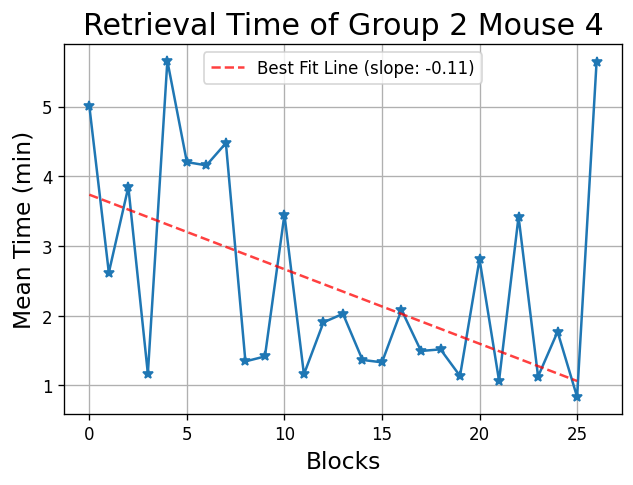

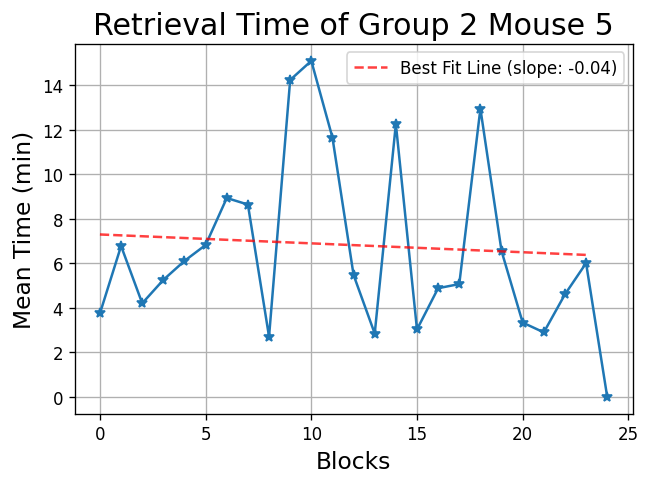

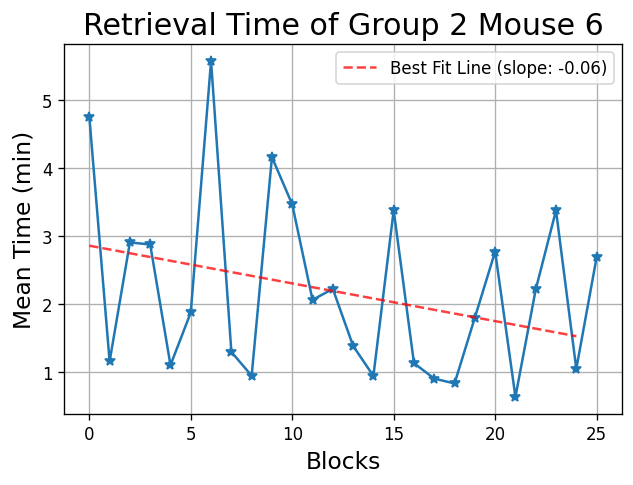

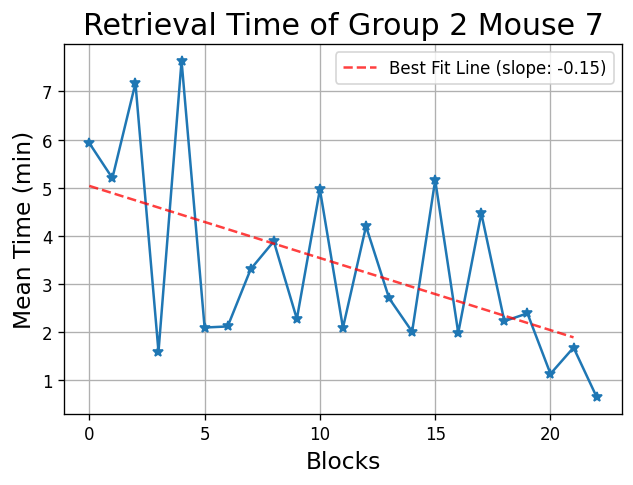

In [11]:
female_all_times = []
female_mean = []
female_pred = []
female_slope= []
rev_female_time_dict = {}

for sheet in rev_female_sheets[:]:
    times, mean, std = mean_pellet_collect_time(rev_female_path, sheet, remove_outlier=True, n_stds=3, day=day)
    _, pred, slope = plot_retrieval_time_by_block(rev_female_path, sheet, day=day, n_stds=3, export_root=export_root)
    male_all_times.append(times)
    female_all_times.append(times)
    female_mean.append(mean)
    female_pred.append(pred)
    female_slope.append(slope)
    rev_female_time_dict[sheet] = mean

Male Size: 19
Female Size: 16
Male Average: 2.143620591903534
Female Average: 4.127081209620984
Male Standard Deviation: 0.5190620991180352
Female Standard Deviation: 0.7225645023334196


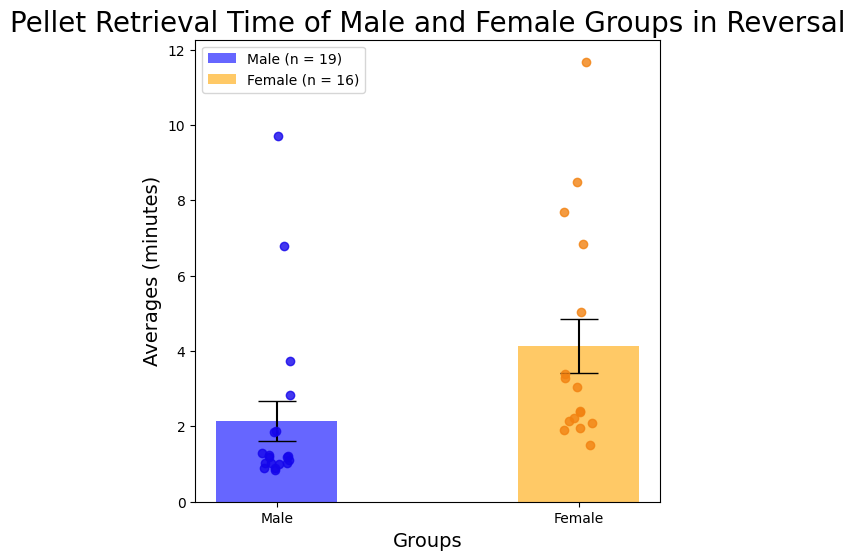

In [12]:
dit.graph_group_stats(male_mean, female_mean, 'Pellet Retrieval Time',  
                      group_names=['Male', 'Female'], unit='minutes', rev=True, export_name='rev_retrieval_mean')

In [13]:
import intervals as invs

invs.perform_T_test(male_mean, female_mean, test_side='two-sided')

P Value is  0.034166874586641076
There is a significant difference between the two groups.


In [14]:
invs.perform_T_test(male_mean, female_mean, test_side='two-sided')

P Value is  0.034166874586641076
There is a significant difference between the two groups.


In [15]:
invs.perform_T_test(male_slope, female_slope, test_side='two-sided')

P Value is  0.3491227148183773
There is no significant difference between the two groups.


In [16]:
invs.perform_T_test(male_pred, female_pred, test_side='two-sided')

P Value is  0.013528280628567774
There is a significant difference between the two groups.


Male Size: 19
Female Size: 16
Male Average: 1.2841529257816777
Female Average: 3.5259829510232237
Male Standard Deviation: 0.3132635351008611
Female Standard Deviation: 0.8294828392390747


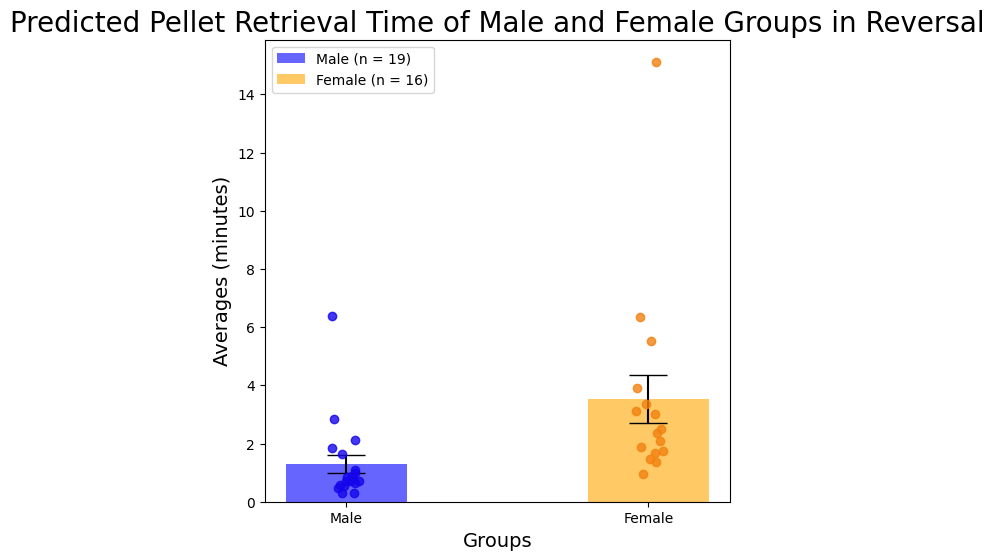

In [17]:
dit.graph_group_stats(male_pred, female_pred, 'Predicted Pellet Retrieval Time',  group_names=['Male', 'Female'],
                      unit='minutes', rev=True, export_name='rev_retrieval_pred')

Male Size: 19
Female Size: 16
Male Average: -0.21210526315789474
Female Average: -0.055
Male Standard Deviation: 0.1433678393746767
Female Standard Deviation: 0.04061057436185802


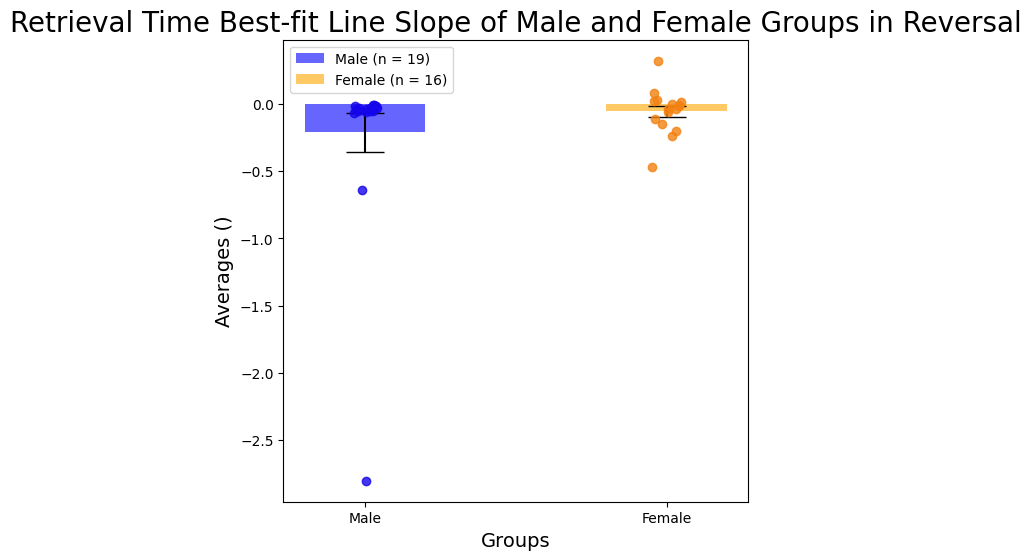

In [18]:
dit.graph_group_stats(male_slope, female_slope, 'Retrieval Time Best-fit Line Slope',  group_names=['Male', 'Female'], 
                      unit='', rev=True, export_name='rev_retrieval_slope')

In [19]:
male_all_times = []
male_means = []
male_stds = []
fr1_male_dict = {}

for sheet in fr1_male_sheets:
    times, mean, std = mean_pellet_collect_time(fr1_male_path, sheet, remove_outlier=True, n_stds=2, day=3)
    male_all_times.append(times)
    male_means.append(mean)
    male_stds.append(std)
    fr1_male_dict[sheet] = mean

In [20]:
female_all_times = []
female_means = []
female_stds = []
fr1_female_dict = {}

for sheet in fr1_female_sheets:
    times, mean, std = mean_pellet_collect_time(fr1_female_path, sheet, remove_outlier=True, n_stds=2, day=3)
    female_all_times.append(times)
    female_means.append(mean)
    female_stds.append(std)
    fr1_female_dict[sheet] = mean

Male Size: 17
Female Size: 13
Male Average: 3.579263793624165
Female Average: 5.985384473992675
Male Standard Deviation: 0.8622106738902885
Female Standard Deviation: 1.336786122352378


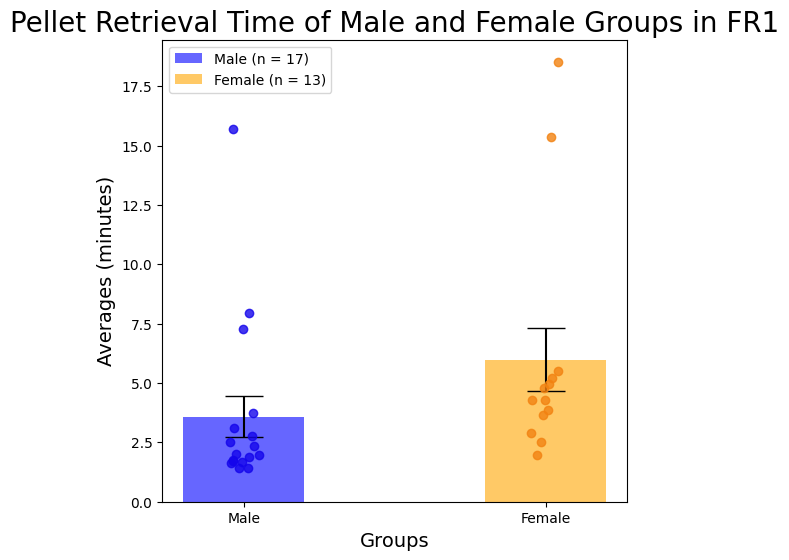

In [21]:
dit.graph_group_stats(male_means, female_means, 'Pellet Retrieval Time',  group_names=['Male', 'Female'],
                      unit='minutes', rev=False, export_name='fr1_retrieval_mean')

In [22]:
import intervals as invs

invs.perform_T_test(male_means, female_means, test_side='two-sided')

P Value is  0.13971754090151303
There is no significant difference between the two groups.


In [23]:
invs.perform_T_test(male_stds, female_stds, test_side='two-sided')

P Value is  0.05240379859620509
There is no significant difference between the two groups.


## Correlation

In [24]:
import numpy as np
import pickle

fr1_male_acc, fr1_female_acc = pickle.load(open('../data/wt_fr1_acc.pkl', 'rb'))

shared_fr1_male_acc = []
shared_fr1_female_acc = []
shared_rev_male_dict = []
shared_rev_female_dict = []

full_fr1_male_acc = []
full_fr1_female_acc = []
full_fr1_male_time = []
full_fr1_female_time = []

# reversal retrieval time vs. FR1 accuracy
for each in np.intersect1d(list(rev_female_time_dict.keys()), list(fr1_female_acc.keys())):
    shared_fr1_female_acc.append(fr1_female_acc[each])
    shared_rev_female_dict.append(rev_female_time_dict[each])

for each in np.intersect1d(list(rev_male_time_dict.keys()), list(fr1_male_acc.keys())):
    shared_fr1_male_acc.append(fr1_male_acc[each])
    shared_rev_male_dict.append(rev_male_time_dict[each])

# FR1 accuracy vs FR1 retrieval time
for key, value in fr1_female_acc.items():
    full_fr1_female_acc.append(value)
    full_fr1_female_time.append(fr1_female_dict[key])
    
for key, value in fr1_male_acc.items():
    full_fr1_male_acc.append(value)
    full_fr1_male_time.append(fr1_male_dict[key])
    

In [25]:
np.corrcoef(shared_fr1_female_acc, shared_rev_female_dict)[0, 1]

0.09323499050807943

In [26]:
np.corrcoef(shared_fr1_male_acc, shared_rev_male_dict)[0, 1]

0.188628941726627

In [27]:
np.corrcoef(full_fr1_female_acc, full_fr1_female_time)[0, 1]

-0.12235588064465988

In [28]:
np.corrcoef(full_fr1_male_acc, full_fr1_male_time)[0, 1]

-0.3298535101825722